In [2]:
import matplotlib as m
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas as pd
import geopandas as gpd
import numpy as np
import copy
import json

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
# Summation of the value insde a dictionary
def dictsum(myDict):      
    sum = 0
    for i in myDict: 
        sum = sum + myDict[i] 
    return sum

## Total population

In [5]:
# We only care about the country sequence
file = open("/media/shiyuan/Shared/Desktop/comparison/Total_pop.json", "r")
population2 = file.read()
population2 = json.loads(population2)
Countries = list(population2.keys())

In [6]:
Countries

['AFG',
 'ALB',
 'DZA',
 'AND',
 'AGO',
 'ATG',
 'ARG',
 'ARM',
 'ABW',
 'AUS',
 'AUT',
 'AZE',
 'BHS',
 'BHR',
 'BGD',
 'BRB',
 'BLR',
 'BEL',
 'BLZ',
 'BEN',
 'BMU',
 'BTN',
 'BOL',
 'BIH',
 'BWA',
 'BRA',
 'VGB',
 'BRN',
 'BGR',
 'BFA',
 'BDI',
 'KHM',
 'CMR',
 'CAN',
 'CPV',
 'CYM',
 'CAF',
 'TCD',
 'CHL',
 'CHN',
 'COL',
 'COG',
 'CRI',
 'HRV',
 'CUB',
 'CYP',
 'CZE',
 'CIV',
 'PRK',
 'COD',
 'DNK',
 'DJI',
 'DOM',
 'ECU',
 'EGY',
 'SLV',
 'ERI',
 'EST',
 'ETH',
 'FJI',
 'FIN',
 'FRA',
 'PYF',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GRC',
 'GRL',
 'GTM',
 'GIN',
 'GUY',
 'HTI',
 'HND',
 'HKG',
 'HUN',
 'ISL',
 'IND',
 'IDN',
 'IRN',
 'IRQ',
 'IRL',
 'ISR',
 'ITA',
 'JAM',
 'JPN',
 'JOR',
 'KAZ',
 'KEN',
 'KWT',
 'KGZ',
 'LAO',
 'LVA',
 'LBN',
 'LSO',
 'LBR',
 'LBY',
 'LIE',
 'LTU',
 'LUX',
 'MAC',
 'MDG',
 'MWI',
 'MYS',
 'MDV',
 'MLI',
 'MLT',
 'MRT',
 'MUS',
 'MEX',
 'MCO',
 'MNG',
 'MNE',
 'MAR',
 'MOZ',
 'MMR',
 'NAM',
 'NPL',
 'NLD',
 'NCL',
 'NZL',
 'NIC',
 'NER',
 'NGA',


In [31]:
file = open("C:/Users/15311/Desktop/new_results/Total_pop_newest.json", "r")
population = file.read()
population = json.loads(population)
population = {k: population[k] for k in Countries}

## VSL

In [32]:
file = open("VSL_dict.json", "r")
VSL = file.read()
VSL = json.loads(VSL)

In [33]:
# VSL # in million

## Final demand

In [34]:
file = open("../2_Concentration_Factors/total_output.json", "r")
total_output = file.read()
total_output = json.loads(total_output)

file = open("../2_Concentration_Factors/final_demand.json", "r")
final_demand = file.read()
final_demand = json.loads(final_demand)

In [24]:
list(final_demand.keys()).index('VEN')

182

In [35]:
# per million USD
# EORA is in 1000 USD
for i in Countries:
    total_output[i] = total_output[i] * 1000 / 1000000
    final_demand[i] = final_demand[i] * 1000 / 1000000

## Excess mortality rate (per 100k) due to production

In [38]:
# file = open("C:/Users/15311/Desktop/comparison1/Excess_mort_production1.json", "r")
# excess_mort1 = file.read()
# excess_mort1 = json.loads(excess_mort1)

# file = open("C:/Users/15311/Desktop/comparison1/Excess_mort_production2.json", "r")
# excess_mort2 = file.read()
# excess_mort2 = json.loads(excess_mort2)

# file = open("C:/Users/15311/Desktop/comparison1/Excess_mort_production3.json", "r")
# excess_mort3 = file.read()
# excess_mort3 = json.loads(excess_mort3)

# file = open("C:/Users/15311/Desktop/comparison1/Excess_mort_production4.json", "r")
# excess_mort4 = file.read()
# excess_mort4 = json.loads(excess_mort4)

# file = open("C:/Users/15311/Desktop/comparison1/Excess_mort_production5.json", "r")
# excess_mort5 = file.read()
# excess_mort5 = json.loads(excess_mort5)

# file = open("C:/Users/15311/Desktop/comparison1/Excess_mort_production6.json", "r")
# excess_mort6 = file.read()
# excess_mort6 = json.loads(excess_mort6)

# file = open("C:/Users/15311/Desktop/comparison1/Excess_mort_production7.json", "r")
# excess_mort7 = file.read()
# excess_mort7 = json.loads(excess_mort7)

# file = open("C:/Users/15311/Desktop/comparison1/Excess_mort_production8.json", "r")
# excess_mort8 = file.read()
# excess_mort8 = json.loads(excess_mort8)

# file = open("C:/Users/15311/Desktop/comparison1/Excess_mort_production9.json", "r")
# excess_mort9 = file.read()
# excess_mort9 = json.loads(excess_mort9)

In [39]:
# # per 100k capita
# pro_mort={**excess_mort1, **excess_mort2,**excess_mort3,**excess_mort4,**excess_mort5,**excess_mort6,**excess_mort7,**excess_mort8,**excess_mort9} 

In [40]:
# total number of deaths caused by country i and happen in country j
file = open("../3_Mortality/TotDeath_pro_countrywise.json", "r")
pro_mort_tol_old = file.read()
pro_mort_tol_old = json.loads(pro_mort_tol_old)
pro_mort_tol = {}
for country in pro_mort_tol_old:
    pro_mort_tol[country[:3]] = pro_mort_tol_old[country]
# pro_mort_tol = {}
# for i in Countries:
#     pro_mort_tol[i] = {}
#     for j in Countries:
#         pro_mort_tol[i][j] = pro_mort[i][j] * (population[j] / 100000)

In [41]:
file=open("pro_mort_tol.json",'w')
json.dump(pro_mort_tol,file)
file.close()

In [42]:
# total number of death happening in one country due to other countries' production
pro_death = dict(pd.DataFrame(pro_mort_tol).sum(axis = 1))

In [43]:
pro_death

{'AFG': 5375.976791639045,
 'ALB': 1292.790157496459,
 'DZA': 5147.1405641943475,
 'AND': 7.720691315564712,
 'AGO': 11231.154356341218,
 'ATG': 0.0,
 'ARG': 12453.960143998462,
 'ARM': 1601.7297862078517,
 'ABW': 1.7555669331789554,
 'AUS': 5401.590810406131,
 'AUT': 2633.52026273726,
 'AZE': 5124.3040093214395,
 'BHS': 66.23120372291463,
 'BHR': 403.29169750025085,
 'BGD': 62828.24052313411,
 'BRB': 27.936656223241485,
 'BLR': 3322.888112595534,
 'BEL': 4609.856139101452,
 'BLZ': 7.72853220924735,
 'BEN': 1730.9487895782659,
 'BMU': 3.8444628262049108,
 'BTN': 315.51966446029695,
 'BOL': 2333.609688079192,
 'BIH': 2691.414891819858,
 'BWA': 383.43678481363867,
 'BRA': 92051.51869995217,
 'VGB': 0.0,
 'BRN': 37.24793299760297,
 'BGR': 8934.593294355207,
 'BFA': 1022.7701004082758,
 'BDI': 1074.8608503971054,
 'KHM': 4651.963241075975,
 'CMR': 2730.147776209345,
 'CAN': 10010.776501195129,
 'CPV': 49.86707711785958,
 'CYM': 15.102032868876243,
 'CAF': 416.21952828264455,
 'TCD': 571.85

In [44]:
dictsum(pro_death)

3557084.0529358317

In [45]:
# total number of deaths caused by one country and happen in the whole world
pro_world = {}
for i in pro_mort_tol:
    pro_world[i] = dictsum(pro_mort_tol[i])

In [46]:
print(sorted(pro_world.items(), key=lambda item: item[1],reverse=True)[:5])

[('CHN', 1131190.415254747), ('IND', 549471.3341575842), ('IDN', 169334.20723176212), ('PAK', 94657.96786483776), ('JPN', 92980.88922016804)]


In [47]:
# total number of worldwide death caused by per 100k capita in country i
pro_world_capita = {}
for i in pro_world:
    pro_world_capita[i] = pro_world[i] / (population[i] / 100000)

In [48]:
# # of deaths per million dollars output
pro_world_permillion = {}
for i in Countries:
    pro_world_permillion[i] = pro_world[i] / total_output[i]

## Excess mortality rate due to consumption

In [49]:
file = open("C:/Users/15311/Desktop/new_results/Excess_mort_consumption.json", "r")
con_mort = file.read()
con_mort = json.loads(con_mort)

In [50]:
con_mort

{'AFG': {'ROW': 0.004379040460241683,
  'NZL': 0.002192925787292794,
  'FJI': 0.0,
  'FRA': 0.001025976524750681,
  'USA': 0.0009409607532844841,
  'RUS': 0.041177560515714105,
  'WSM': 0.0,
  'PYF': 0.0002192341817062975,
  'CAN': 0.0005254947003422534,
  'GBR': 0.0009764445243432743,
  'MEX': 0.0010060204051338514,
  'CHL': 0.00314055923870785,
  'ECU': 0.00757905840044968,
  'GTM': 0.009023868501918202,
  'CRI': 0.0018289307297281873,
  'SLV': 0.00836915031260806,
  'BLZ': 0.000308927490557004,
  'HND': 0.0034198244695998283,
  'NIC': 0.003167966246478915,
  'CUB': 0.003306792112076761,
  'PER': 0.0055524023886245055,
  'COL': 0.00159322220643418,
  'PAN': 0.0035894128876933847,
  'CYM': 0.0027895530748810516,
  'JAM': 0.01081306131616311,
  'BHS': 0.002795671795767722,
  'HTI': 0.03238715151174982,
  'BRA': 0.0012975150855516274,
  'ARG': 0.0009934141154651,
  'DOM': 0.0025723364119616702,
  'VEN': 0.0005136968382401212,
  'GRL': 0.0,
  'NLD': 0.004387575944634239,
  'ABW': 0.00049

In [51]:
con_mort_tol = {}
for i in Countries:
    con_mort_tol[i] = {}
    for j in Countries:
        con_mort_tol[i][j] = con_mort[i][j] * (population[j] / 100000)

In [52]:
file=open("con_mort_tol.json",'w')
json.dump(con_mort_tol,file)
file.close()

In [53]:
# total number of death happening in one country due to other countries' consumption
con_death = dict(pd.DataFrame(con_mort_tol).sum(axis = 1))

In [60]:
print(dict(sorted(con_death.items(), key=lambda item: item[1])))

{'ATG': 0.0, 'VGB': 0.0, 'FJI': 0.0, 'GRL': 0.0, 'ISL': 0.0, 'WSM': 0.0, 'VUT': 0.0, 'SMR': 1.6069576055748769, 'ABW': 1.7555669331789607, 'SYC': 3.681415152776556, 'PYF': 3.7495560617032324, 'BMU': 3.844462826204858, 'LIE': 4.377040374231211, 'AND': 7.720691315564698, 'BLZ': 7.728532209248591, 'CYM': 15.102032868877519, 'GUY': 19.394434554641457, 'BRB': 27.936656223249955, 'STP': 28.824378350733575, 'MCO': 29.260603507985838, 'BRN': 37.24793299760546, 'SUR': 43.966353822603004, 'CPV': 49.86707711786188, 'NOR': 51.32104522431051, 'BHS': 66.23120372291751, 'DJI': 80.96512451700681, 'LUX': 81.13344987591006, 'MDV': 81.51912074786506, 'EST': 82.57085978219172, 'PNG': 83.66645558110724, 'NCL': 84.93725294115713, 'MLT': 103.75614290045837, 'TTO': 125.08186720849622, 'MRT': 142.1505271121553, 'GMB': 150.53539870482015, 'IRL': 164.23746590890207, 'NAM': 178.74425969844702, 'FIN': 236.99195915085548, 'LBR': 258.991856287071, 'LVA': 281.1352070425828, 'KWT': 301.9040927035568, 'MUS': 303.976141

In [54]:
dictsum(con_death)

3557084.0529364827

In [55]:
# total number of deaths caused by one country and happen in the whole world
con_world = {}
for i in con_mort_tol:
    con_world[i] = dictsum(con_mort_tol[i])

In [56]:
print(sorted(con_world.items(), key=lambda item: item[1],reverse=True)[:5])

[('CHN', 1023410.8300149156), ('IND', 447292.39315022324), ('USA', 230725.6868888209), ('IDN', 157906.31059919845), ('JPN', 124004.26105568584)]


In [57]:
# per 100k capita
con_world_capita = {}
for i in con_world:
    con_world_capita[i] = con_world[i] / (population[i] / 100000)

In [58]:
# # of deaths per million dollars demand
con_world_permillion = {}
for i in Countries:
    if i != 'ROW':
        con_world_permillion[i] = con_world[i] / final_demand[i] 
    else:
        con_world_permillion[i] = con_world[i]

----

### VSL_pro_death == VSL_con_death == Number of death * value of statistical life

In [61]:
VSL_pro_death = {}
for i in Countries:
    for j in Countries:
        VSL_pro_death[i] = VSL[i] * pro_death[i] # VSL:million; pro_mort_tol: No. of deaths

In [62]:
VSL_con_death = {}
for i in Countries:
    VSL_con_death[i] = VSL[i] * con_death[i] # VSL:million; pro_mort_tol: No. of deaths

In [64]:
for i in Countries:
    if (VSL_con_death[i] - VSL_pro_death[i]) < 1:
        continue
    else:
        print(i,VSL_con_death[i] - VSL_pro_death[i])

BGD 68.35700497177822
BTN 2.49827618054411
KHM 5.195135203679797
CHN 934769.103134669
PRK 548.6010674829606
HKG 9840.620500991048
IND 351.91489405787433
IDN 18.554677410967997
IRN 1.3238921235897578
JPN 36634.37909503875
KAZ 95.47055531431579
KGZ 3.65814662150882
LAO 24.348406890210583
MAC 2475.5193822055544
MYS 15.874690203731006
MNG 12.552183442792682
MMR 27.410635109637496
NPL 12.837266793993876
PAK 13.46562092511158
PHL 28.843062369836844
KOR 18757.6541583832
RUS 658.9011140224757
SGP 5.399714799845242
TWN 3278.1349466320535
THA 155.85966036518948
TKM 2.4910583575097007
UZB 10.608156521793717
VNM 1018.1721138141584


-----

In [65]:
diff = {}
for i in con_world:
    diff[i] = con_world[i] - pro_world[i]

In [66]:
diff['CHN'],diff['USA']

(609320.2791039422, 150779.47314762828)

In [36]:
net_export_capita = {}
for i in diff:
    net_export_capita[i] = diff[i]/(population[j] / 100000)

In [37]:
net_export_capita # per 100k capita

{'AFG': -8.827017083604824,
 'ALB': -8.952219467174388,
 'DZA': 128.02282930980476,
 'AND': 1.6513035346991232,
 'AGO': 31.58232292634958,
 'ATG': 0.5229341367813655,
 'ARG': 151.26396783319498,
 'ARM': -2.3620451866987477,
 'ABW': 1.0899684989411724,
 'AUS': 208.50198033238087,
 'AUT': 75.5090686436903,
 'AZE': 23.923170494467957,
 'BHS': 0.5397920880701909,
 'BHR': 24.36114868540011,
 'BGD': 7.355317940692986,
 'BRB': 0.5481714662344408,
 'BLR': -21.45897669522598,
 'BEL': 61.79242774421026,
 'BLZ': 0.7609045728467191,
 'BEN': -3.6213145721920523,
 'BMU': 3.553124521398755,
 'BTN': -1.8676868826444915,
 'BOL': 3.2219673823776542,
 'BIH': -42.26932355506496,
 'BWA': 5.611409669521344,
 'BRA': 5.04376429377551,
 'VGB': 0.3473846686701907,
 'BRN': 3.2562207381525807,
 'BGR': -29.839821458311643,
 'BFA': -3.0836073482164568,
 'BDI': -14.320867621939911,
 'KHM': -11.383109035931433,
 'CMR': -3.234043798076266,
 'CAN': 455.705599651119,
 'CPV': 0.8324890997541866,
 'CYM': 1.937551109044642

----

In [38]:
VSL = dict(sorted(VSL.items(), key=lambda item: item[1]))

In [39]:
VSL_pwa = 0
for i in Countries:
    VSL_pwa += VSL[i] * population[i]
VSL_pwa = VSL_pwa/dictsum(population)

In [40]:
VSL_pwa

1.775461398129108

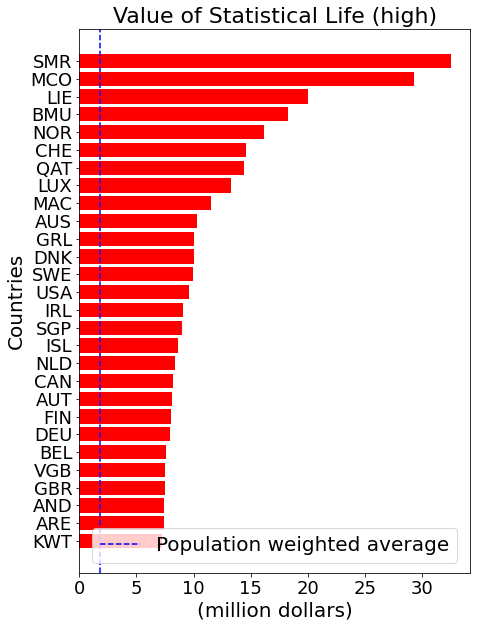

In [41]:
plt.figure(figsize=(7, 10))
plt.barh(list(VSL.keys())[160:], list(VSL.values())[160:], color='red')
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel('(million dollars)',fontsize=20)

plt.title('Value of Statistical Life (high)',fontsize=22)
plt.ylabel('Countries',fontsize=20)

plt.axvline(x=VSL_pwa, ls= "--", label = "Population weighted average",color = 'Blue')
plt.legend(fontsize=20,loc="lower center")
# for a,b in zip(final_demand.keys(), final_demand.values()):
#     plt.text(a, b, '%.0f' % b, ha='bottom', va= 'center',fontsize=12,color='b')
    

In [42]:
VSL = dict(sorted(VSL.items(), key=lambda item: item[1],reverse=True))

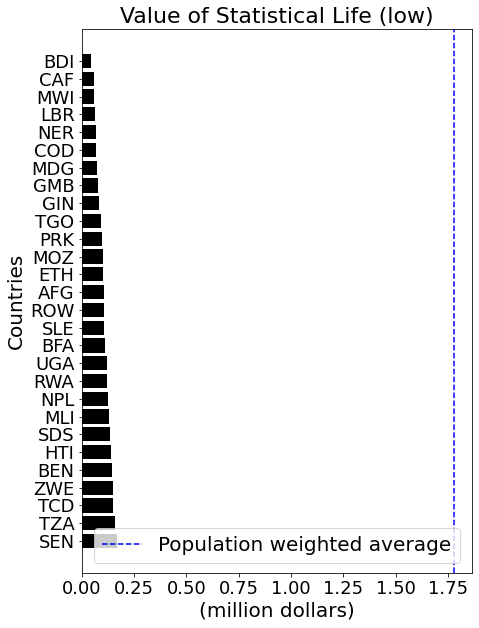

In [43]:
plt.figure(figsize=(7, 10))
plt.barh(list(VSL.keys())[160:], list(VSL.values())[160:], color='black')
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel('(million dollars)',fontsize=20)

plt.title('Value of Statistical Life (low)',fontsize=22)
plt.ylabel('Countries',fontsize=20)

plt.axvline(x=VSL_pwa, ls= "--", label = "Population weighted average",color = 'Blue')
plt.legend(fontsize=20,loc="lower center")
# for a,b in zip(final_demand.keys(), final_demand.values()):
#     plt.text(a, b, '%.0f' % b, ha='bottom', va= 'center',fontsize=12,color='b')

-----

In [44]:
final_demand = dict(sorted(final_demand.items(), key=lambda item: item[1]))

In [45]:
fd_pwa = 0
for i in Countries:
    fd_pwa += final_demand[i] * population[i]
fd_pwa = fd_pwa/dictsum(population)

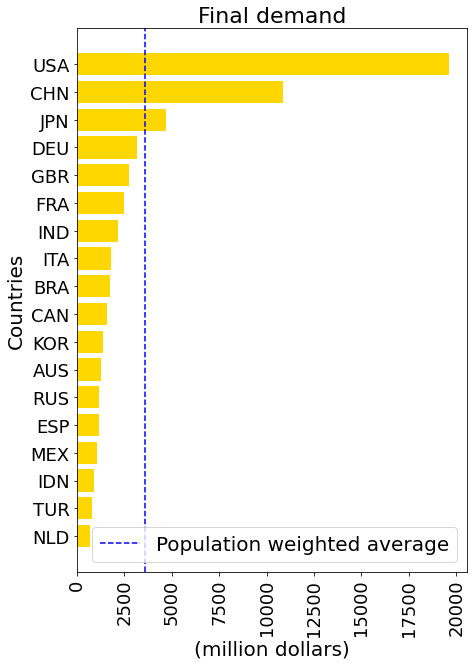

In [46]:
plt.figure(figsize=(7, 10))
plt.barh(list(final_demand.keys())[170:], list(final_demand.values())[170:], color='gold')
plt.xticks(fontsize=18,rotation=90);
plt.yticks(fontsize=18);
plt.xlabel('(million dollars)',fontsize=20)

plt.title('Final demand',fontsize=22)
plt.ylabel('Countries',fontsize=20)

plt.axvline(x=fd_pwa, ls= "--", label = "Population weighted average",color = 'Blue')
plt.legend(fontsize=20)
# for a,b in zip(final_demand.keys(), final_demand.values()):
#     plt.text(a, b, '%.0f' % b, ha='bottom', va= 'center',fontsize=12,color='b')
    

In [47]:
total_output = dict(sorted(total_output.items(), key=lambda item: item[1]))

In [48]:
to_pwa = 0
for i in Countries:
    to_pwa += total_output[i] * population[i]
to_pwa = to_pwa/dictsum(population)

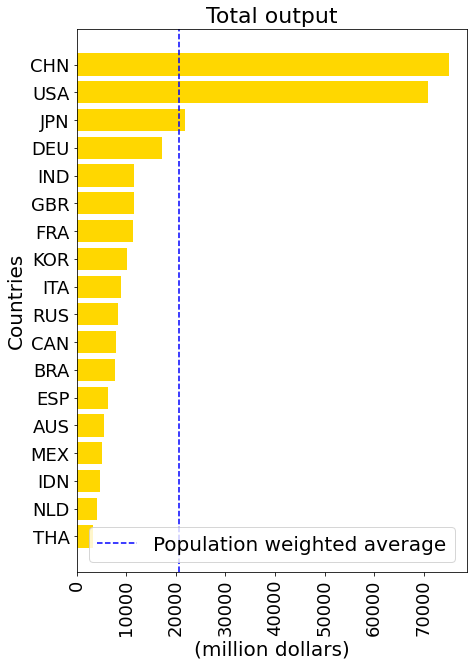

In [49]:
plt.figure(figsize=(7, 10))
plt.barh(list(total_output.keys())[170:], list(total_output.values())[170:], color='gold')
plt.xticks(fontsize=18,rotation=90);
plt.yticks(fontsize=18);
plt.xlabel('(million dollars)',fontsize=20)

plt.title('Total output',fontsize=22)
plt.ylabel('Countries',fontsize=20)

plt.axvline(x=to_pwa, ls= "--", label = "Population weighted average",color = 'Blue')
plt.legend(fontsize=20,loc="lower center")
# for a,b in zip(final_demand.keys(), final_demand.values()):
#     plt.text(a, b, '%.0f' % b, ha='bottom', va= 'center',fontsize=12,color='b')
    

In [50]:
total_output

{'MDA': 0.6477880904631631,
 'STP': 1.714726721383353,
 'WSM': 4.1527634142752525,
 'VUT': 4.333615564421547,
 'VGB': 6.313736062434502,
 'ATG': 6.316736883718098,
 'SOM': 6.667673334637654,
 'GMB': 7.631510907230692,
 'BLZ': 8.398055995796708,
 'CPV': 8.544061623409801,
 'CAF': 8.66486011846339,
 'LBR': 9.368957182243916,
 'SYC': 10.614889070137393,
 'SMR': 10.70512681686101,
 'BTN': 11.656763545881727,
 'BDI': 12.550941336344131,
 'LSO': 12.896709518745409,
 'GRL': 12.915467492402701,
 'DJI': 13.695192268878888,
 'ABW': 14.269258836237018,
 'AND': 14.355632869848721,
 'SUR': 18.617021283343934,
 'CYM': 19.566695653979647,
 'ERI': 20.00961763182219,
 'MDV': 20.153448803674976,
 'SWZ': 20.2531506475404,
 'BRB': 21.70462323073916,
 'BMU': 22.203668609052695,
 'FJI': 22.222167201917028,
 'TGO': 23.789854229005027,
 'MRT': 25.13657414216621,
 'MWI': 26.608358898665447,
 'MNE': 27.497156103126944,
 'PYF': 27.740950477265105,
 'MCO': 31.76337112709631,
 'SLE': 32.84699512580837,
 'TJK': 35.

---

In [51]:
con_world = dict(sorted(con_world.items(), key=lambda item: item[1]))

In [52]:
con_pwa = 0
for i in Countries:
    con_pwa += con_world[i] * population[i]
con_pwa = con_pwa/dictsum(population)

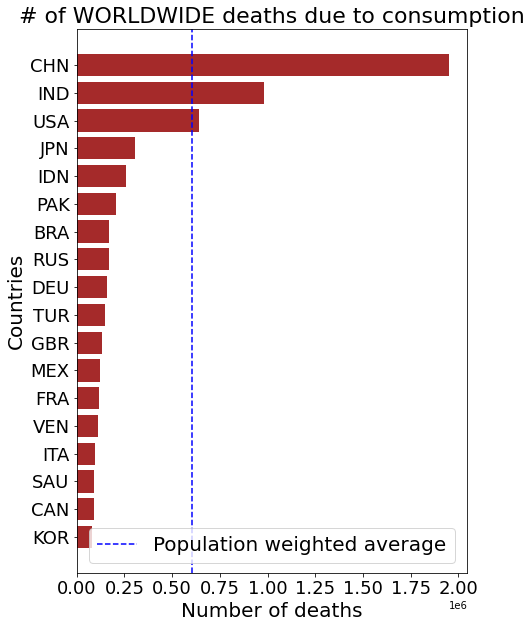

In [53]:
plt.figure(figsize=(7, 10))
plt.barh(list(con_world.keys())[170:], list(con_world.values())[170:], color='brown')
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel('Number of deaths',fontsize=20)

plt.title('# of WORLDWIDE deaths due to consumption',fontsize=22)
plt.ylabel('Countries',fontsize=20)

plt.axvline(x=con_pwa, ls= "--", label = "Population weighted average",color = 'Blue')
plt.legend(fontsize=20,loc="lower center")

# for a,b in zip(con_world.keys(), con_world.values()):
#     plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=12,color='b')

In [54]:
pro_world = dict(sorted(pro_world.items(), key=lambda item: item[1]))

In [55]:
pro_pwa = 0
for i in Countries:
    pro_pwa += pro_world[i] * population[i]
pro_pwa = pro_pwa/dictsum(population)

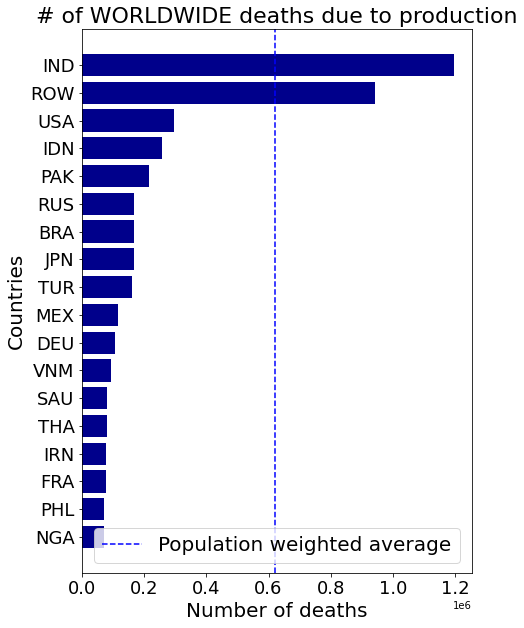

In [56]:
plt.figure(figsize=(7, 10))
plt.barh(list(pro_world.keys())[169:187], list(pro_world.values())[169:187], color='darkblue')
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel('Number of deaths',fontsize=20)

plt.title('# of WORLDWIDE deaths due to production',fontsize=22)
plt.ylabel('Countries',fontsize=20)


plt.axvline(x=pro_pwa, ls= "--", label = "Population weighted average",color = 'Blue')
plt.legend(fontsize=20,loc="lower center")

----

In [57]:
pro_death = dict(sorted(pro_death.items(), key=lambda item: item[1]))

In [58]:
pro_pwa2 = 0
for i in Countries:
    pro_pwa2 += pro_death[i] * population[i]
pro_pwa2 = pro_pwa2/dictsum(population)

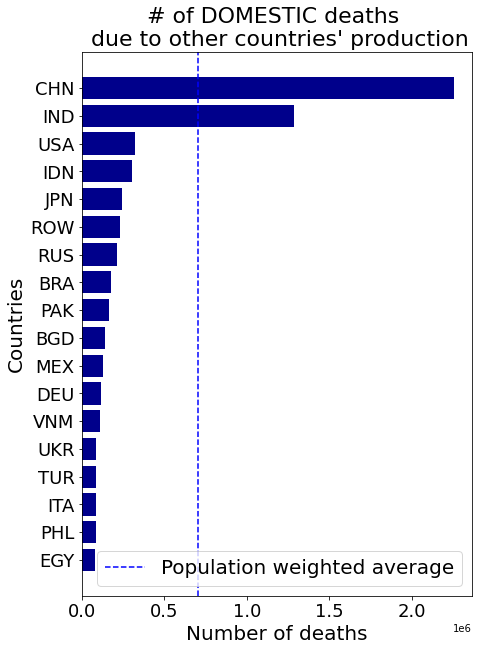

In [59]:
plt.figure(figsize=(7, 10))
plt.barh(list(pro_death.keys())[170:], list(pro_death.values())[170:], color='darkblue')
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel('Number of deaths',fontsize=20)

plt.title('# of DOMESTIC deaths \n due to other countries\' production',fontsize=22)
plt.ylabel('Countries',fontsize=20)


plt.axvline(x=pro_pwa2, ls= "--", label = "Population weighted average",color = 'Blue')
plt.legend(fontsize=20)

In [60]:
con_death = dict(sorted(con_death.items(), key=lambda item: item[1]))

In [61]:
con_pwa2 = 0
for i in Countries:
    con_pwa2 += con_death[i] * population[i]
con_pwa2 = con_pwa2/dictsum(population)

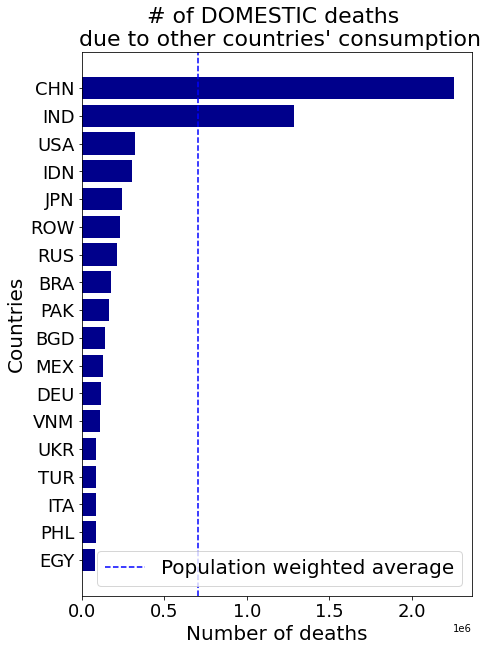

In [62]:
plt.figure(figsize=(7, 10))
plt.barh(list(con_death.keys())[170:], list(con_death.values())[170:], color='darkblue')
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel('Number of deaths',fontsize=20)

plt.title('# of DOMESTIC deaths \n due to other countries\' consumption',fontsize=22)
plt.ylabel('Countries',fontsize=20)


plt.axvline(x=con_pwa2, ls= "--", label = "Population weighted average",color = 'Blue')
plt.legend(fontsize=20)

Number of DOMESTIC deaths due to other countries' consumption should equal to Number of DOMESTIC deaths due to other countries' production. Thus, we call it **Number of DOMESTIC deaths due to global trade**.

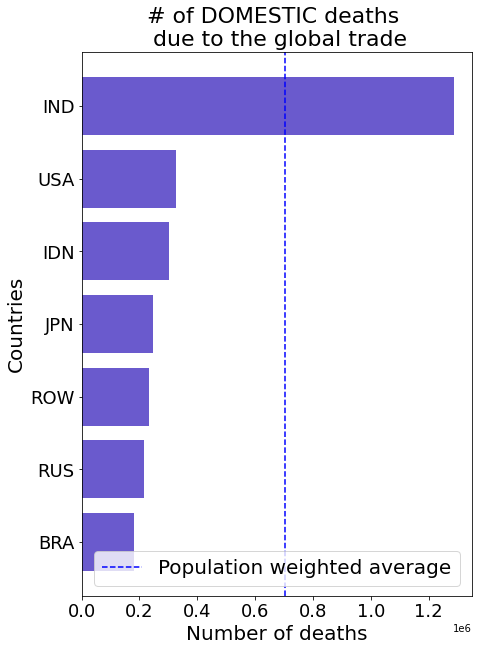

In [63]:
plt.figure(figsize=(7, 10))
plt.barh(list(con_death.keys())[180:187], list(con_death.values())[180:187], color='slateblue')
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel('Number of deaths',fontsize=20)

plt.title('# of DOMESTIC deaths \n due to the global trade',fontsize=22)
plt.ylabel('Countries',fontsize=20)


plt.axvline(x=con_pwa2, ls= "--", label = "Population weighted average",color = 'Blue')
plt.legend(fontsize=20,loc="lower center")

------

In [64]:
pro_world_permillion = dict(sorted(pro_world_permillion.items(), key=lambda item: item[1]))

In [65]:
pro_permillion_pwa = 0
for i in Countries:
    pro_permillion_pwa += pro_world_permillion[i] * population[i]
pro_permillion_pwa = pro_permillion_pwa/dictsum(population)

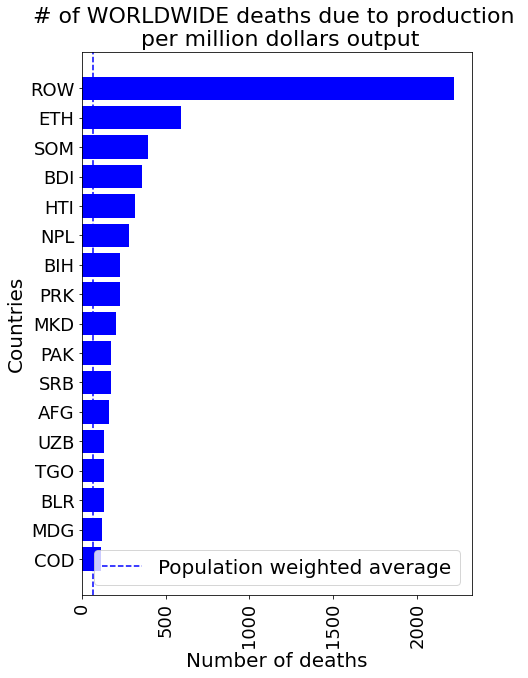

In [66]:
plt.figure(figsize=(7, 10))
plt.barh(list(pro_world_permillion.keys())[170:187], list(pro_world_permillion.values())[170:187], color='blue')
plt.xticks(fontsize=18,rotation=90);
plt.yticks(fontsize=18);
plt.xlabel('Number of deaths',fontsize=20)

plt.title('# of WORLDWIDE deaths due to production \n per million dollars output',fontsize=22)
plt.ylabel('Countries',fontsize=20)


plt.axvline(x=pro_permillion_pwa, ls= "--", label = "Population weighted average",color = 'Blue')
plt.legend(fontsize=20,loc="lower center")

In [67]:
con_world_permillion = dict(sorted(con_world_permillion.items(), key=lambda item: item[1]))

In [68]:
con_permillion_pwa = 0
for i in Countries:
    con_permillion_pwa += con_world_permillion[i] * population[i]
con_permillion_pwa = con_permillion_pwa/dictsum(population)

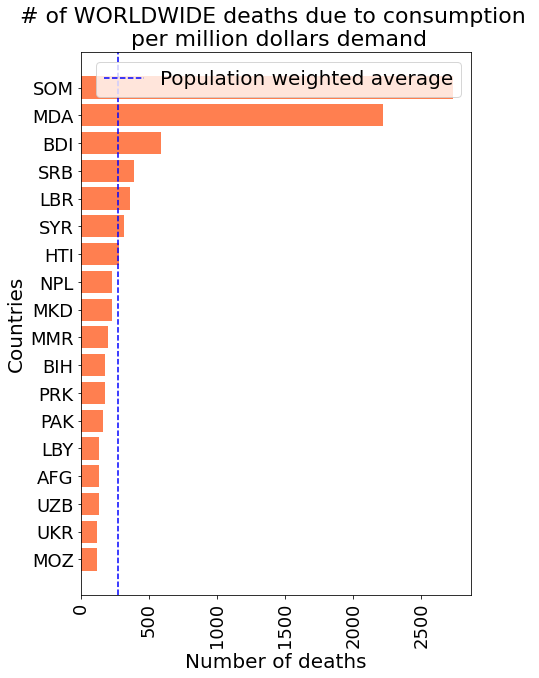

In [69]:
plt.figure(figsize=(7, 10))
plt.barh(list(con_world_permillion.keys())[170:], list(pro_world_permillion.values())[170:], color='coral')
plt.xticks(fontsize=18,rotation=90);
plt.yticks(fontsize=18);
plt.xlabel('Number of deaths',fontsize=20)

plt.title('# of WORLDWIDE deaths due to consumption \n per million dollars demand',fontsize=22)
plt.ylabel('Countries',fontsize=20)


plt.axvline(x=con_permillion_pwa, ls= "--", label = "Population weighted average",color = 'Blue')
plt.legend(fontsize=20)

In [70]:
VSL_pro_death = dict(sorted(VSL_pro_death.items(), key=lambda item: item[1]))

In [71]:
VSL_pro_death_pwa = 0
for i in Countries:
    VSL_pro_death_pwa += VSL_pro_death[i] * population[i]
VSL_pro_death_pwa = VSL_pro_death_pwa/dictsum(population)

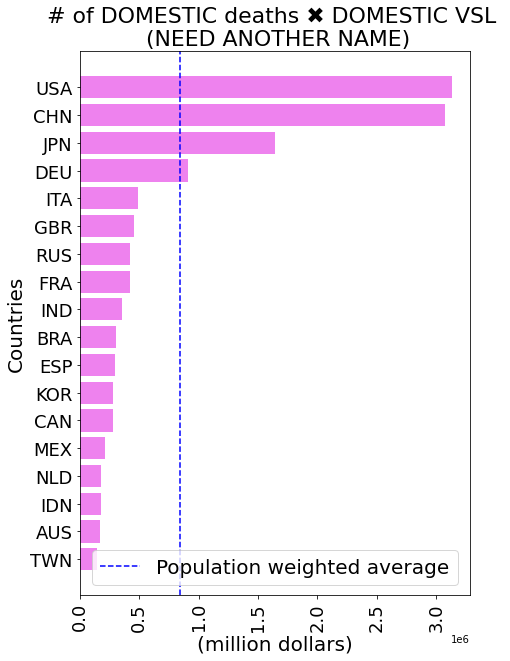

In [72]:
plt.figure(figsize=(7, 10))
plt.barh(list(VSL_pro_death.keys())[170:], list(VSL_pro_death.values())[170:], color='violet')
plt.xticks(fontsize=18,rotation=90);
plt.yticks(fontsize=18);
plt.xlabel('(million dollars)',fontsize=20)

plt.title('# of DOMESTIC deaths ✖ DOMESTIC VSL \n (NEED ANOTHER NAME)',fontsize=22)
plt.ylabel('Countries',fontsize=20)


plt.axvline(x=VSL_pro_death_pwa, ls= "--", label = "Population weighted average",color = 'Blue')
plt.legend(fontsize=20,loc="lower center")

---

In [73]:
print(dict(sorted(con_world_capita.items(), key=lambda item: item[1])))

{'ROW': 0.0, 'ETH': 5.289711883323672, 'SDS': 6.254968374233338, 'NER': 6.935622834194867, 'MDA': 9.50468339970105, 'BFA': 9.527252738701547, 'MLI': 12.365947735679951, 'MWI': 13.219083399860166, 'TCD': 14.538206753979507, 'CAF': 14.832800011702076, 'COD': 17.284186307276123, 'MDG': 18.777202317553876, 'CMR': 19.08794033656317, 'CIV': 20.178199384808508, 'GMB': 20.790354009079913, 'ERI': 21.368923297682752, 'CPV': 22.162646022391716, 'UGA': 22.41610486103851, 'PSE': 23.223956576649503, 'SUD': 23.317054214091968, 'RWA': 23.368009181977875, 'ZWE': 24.33850760738295, 'KHM': 24.52167561516937, 'SLE': 25.538177992332088, 'BEN': 25.55829016309038, 'BDI': 25.661760020877978, 'MOZ': 26.125568695392968, 'TGO': 26.22017656580101, 'SOM': 26.703390258217492, 'NIC': 26.911059584197247, 'LSO': 27.41576109459221, 'MRT': 27.905921123101994, 'YEM': 28.845950400801055, 'GIN': 30.16731407277428, 'SEN': 30.600443154950838, 'VUT': 31.491215428895025, 'GHA': 32.02445467513871, 'PNG': 33.71720838648586, 'TZA

In [74]:
population['VEN'],population['LBY']

(32290327.555760123, 6918753.53670441)

In [75]:
con_world['VEN'],con_world['LBY']

(112104.23159152662, 14641.513876038272)

In [76]:
# print(dict(sorted(net_export_capita.items(), key=lambda item: item[1])))

-----

In [77]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(20,9)
mpl.style.use('ggplot')

In [78]:
df_shp = gpd.read_file('C:/Users/15311/Desktop/natural_earth_vector/10m_cultural/ne_10m_admin_0_countries.shp')

In [79]:
df_shp["consumption"] = np.nan
df_shp["production"] = np.nan
df_shp["net_export_capita"] = np.nan
df_shp["con_permillion"] = np.nan
df_shp["pro_permillion"] = np.nan
df_shp["final_demand"] = np.nan
df_shp["total_output"] = np.nan
# TOP 5 consumption countries
df_shp["CHN_con"] = np.nan
df_shp["IND_con"] = np.nan
df_shp["USA_con"] = np.nan
df_shp["JPN_con"] = np.nan
df_shp["IDN_con"] = np.nan
# TOP 5 production countries

df_shp["CHN_pro"] = np.nan
df_shp["IND_pro"] = np.nan
df_shp["ROW_pro"] = np.nan
df_shp["USA_pro"] = np.nan
df_shp["IDN_pro"] = np.nan


df_shp["con_world"] = np.nan
df_shp["pro_world"] = np.nan

In [80]:
for i in Countries:
    if i in list(df_shp['ADM0_A3']):
        continue
    else:
        print(i)

PSE
SUD
ROW


In [81]:
for i in df_shp['ADM0_A3']:
    if i in Countries:
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_world"] = con_world[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_world"] = pro_world[i]
        
        df_shp.loc[df_shp['ADM0_A3'] == i,"consumption"] = con_world_capita[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"production"] = pro_world_capita[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"net_export_capita"] = net_export_capita[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_permillion"] = con_world_permillion[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_permillion"] = pro_world_permillion[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"final_demand"] = final_demand[i] 
        df_shp.loc[df_shp['ADM0_A3'] == i,"total_output"] = total_output[i]
        
        df_shp.loc[df_shp['ADM0_A3'] == i,"VSL"] = VSL[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"VSL_by_death"] = VSL_pro_death[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"total_dom_death"] = con_death[i]
        
        df_shp.loc[df_shp['ADM0_A3'] == i,"CHN_con"] = con_mort_tol['CHN'][i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"IND_con"] = con_mort_tol['IND'][i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"USA_con"] = con_mort_tol['USA'][i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"JPN_con"] = con_mort_tol['JPN'][i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"IDN_con"] = con_mort_tol['IDN'][i]
       
        df_shp.loc[df_shp['ADM0_A3'] == i,"CHN_pro"] = pro_mort_tol['CHN'][i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"IND_pro"] = pro_mort_tol['IND'][i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"ROW_pro"] = pro_mort_tol['ROW'][i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"USA_pro"] = pro_mort_tol['USA'][i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"IDN_pro"] = pro_mort_tol['IDN'][i]
        
    if i == 'PSX':
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_world"] = con_world['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_world"] = pro_world['PSE']     
    
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"consumption"] = con_world_capita['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"production"] = pro_world_capita['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"net_export_capita"] = net_export_capita['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"con_permillion"] = con_world_permillion['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"pro_permillion"] = pro_world_permillion['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"final_demand"] = final_demand['PSE'] 
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"total_output"] = total_output['PSE'] 
        
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"VSL"] = VSL['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"VSL_by_death"] = VSL_pro_death['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"total_dom_death"] = con_death['PSE']
        
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"CHN_con"] = con_mort_tol['CHN']['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"IND_con"] = con_mort_tol['IND']['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"USA_con"] = con_mort_tol['USA']['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"JPN_con"] = con_mort_tol['JPN']['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"IDN_con"] = con_mort_tol['IDN']['PSE']
        
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"CHN_pro"] = pro_mort_tol['CHN']['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"IND_pro"] = pro_mort_tol['IND']['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"ROW_pro"] = pro_mort_tol['ROW']['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"USA_pro"] = pro_mort_tol['USA']['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == 'PSX',"IDN_pro"] = pro_mort_tol['IDN']['PSE']
    if i == 'SDN':
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_world"] = con_world['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_world"] = pro_world['SUD'] 
        
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"consumption"] = con_world_capita['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"production"] = pro_world_capita['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"net_export_capita"] = net_export_capita['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"con_permillion"] = con_world_permillion['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"pro_permillion"] = pro_world_permillion['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"final_demand"] = final_demand['SUD'] 
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"total_output"] = total_output['SUD']
        
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"VSL"] = VSL['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"VSL_by_death"] = VSL_pro_death['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"total_dom_death"] = con_death['SUD']
        
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"CHN_con"] = con_mort_tol['CHN']['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"IND_con"] = con_mort_tol['IND']['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"USA_con"] = con_mort_tol['USA']['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"JPN_con"] = con_mort_tol['JPN']['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"IDN_con"] = con_mort_tol['IDN']['SUD']
        
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"CHN_pro"] = pro_mort_tol['CHN']['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"IND_pro"] = pro_mort_tol['IND']['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"ROW_pro"] = pro_mort_tol['ROW']['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"USA_pro"] = pro_mort_tol['USA']['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == 'SDN',"IDN_pro"] = pro_mort_tol['IDN']['SUD']
    if i == 'ROW':
        continue

In [82]:
pro_mort['IDN']['SUD']

0.00024300344672556064

In [83]:
df_shp[df_shp['ADM0_A3'] == 'PSX']

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
11  Admin-0 country          0          5     Israel    IS1         1      2   

        TYPE      ADMIN ADM0_A3  ...   CHN_pro  IND_pro      ROW_pro  \
11  Disputed  Palestine     PSX  ...  0.011082  0.39299  1464.504517   

     USA_pro   IDN_pro    con_world   pro_world    VSL VSL_by_death  \
11  3.042362  0.001237  1463.966998  576.331988  0.532  2567.346762   

   total_dom_death  
11     4825.839779  

[1 rows x 117 columns]

In [84]:
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.colorbar import ColorbarBase
# cmap = ListedColormap(["black", "darkred", "crimson", "salmon", "navy", "violet", "yellow"])
# bounds = [0,1,2,3,4,10,20,30]
# norm = BoundaryNorm(bounds, cmap.N)

# fig, ax = plt.subplots()
# sc = ax.scatter(*np.random.rand(2,100), c=np.random.rand(100)*30, cmap=cmap, norm=norm)
# fig.colorbar(sc, orientation="horizontal", spacing="proportional")

# plt.show()

In [85]:
# total number of deaths caused by one country and happen in the whole world
# pro_world,con_world

### [Sequential color map](https://colorbrewer2.org/#type=sequential&scheme=OrRd&n=9)

---

In [86]:
# find the maximum value in a dictionary
def find_max_indict(target_dict):
    max_key = max(target_dict,key=target_dict.get)
    return(target_dict[max_key])

In [87]:
cmap = ListedColormap(['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#e34a33','#b30000'])
bounds = [0,1,100,1000,5000,30000,1808677]
norm = BoundaryNorm(bounds, cmap.N)

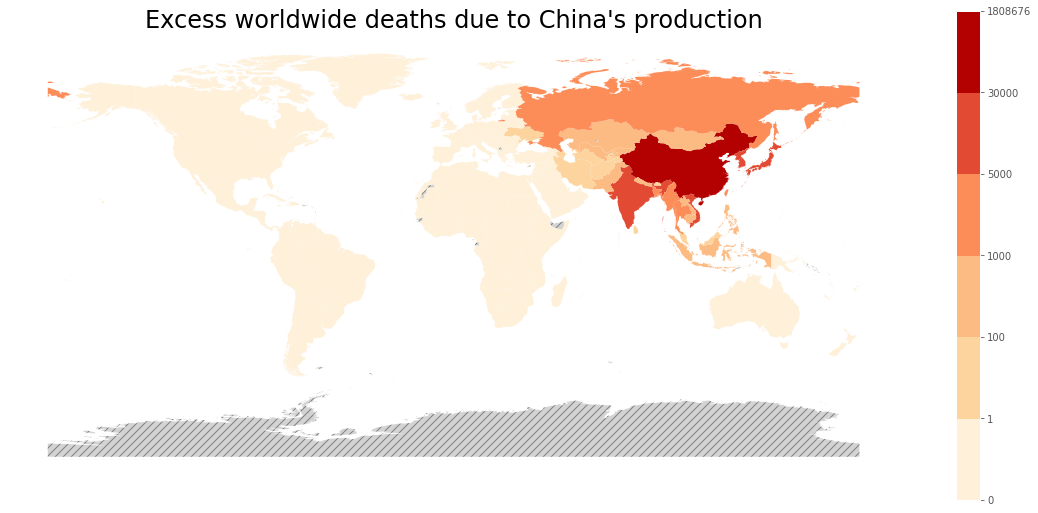

In [88]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='CHN_pro',ax=ax, vmin=0,vmax=1808677, legend=True, cmap = cmap, norm = norm, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",},
        legend_kwds={'fmt': "{:.2f}"})

colourbar = ax.get_figure().get_axes()[1]

yticks = ['0','1','100','1000','5000','30000','1808676']

colourbar.set_yticklabels(yticks)
    
plt.title('Excess worldwide deaths due to China\'s production',fontsize=24)
ax.axis('off');

In [89]:
cmap = ListedColormap(['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#e34a33','#b30000'])
bounds = [0,1,100,1000,10000,90000,948853]
norm = BoundaryNorm(bounds, cmap.N)

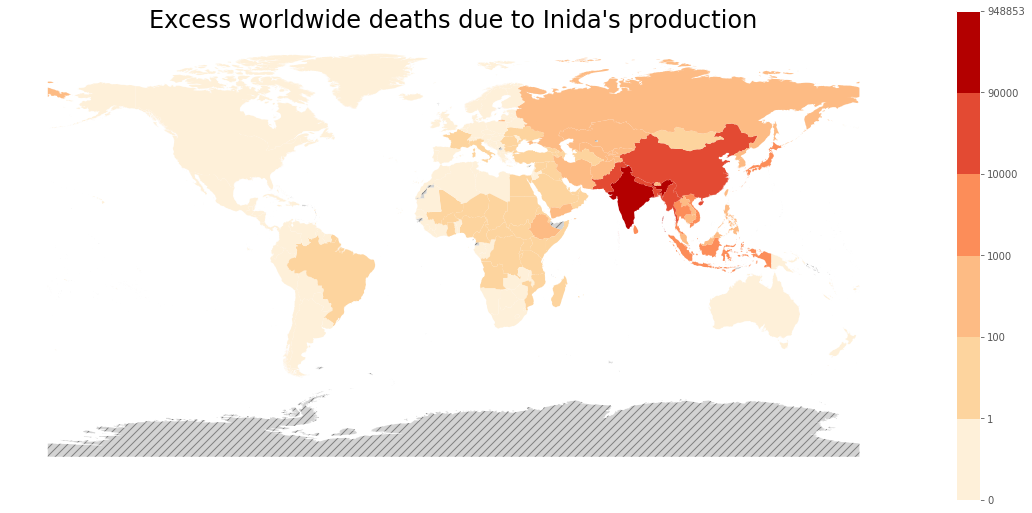

In [90]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='IND_pro',ax=ax, vmin=0,vmax=np.inf, legend=True, cmap = cmap, norm = norm, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",},
        legend_kwds={'fmt': "{:.2f}"})

colourbar = ax.get_figure().get_axes()[1]

yticks = ['0','1','100','1000','10000','90000','948853']

colourbar.set_yticklabels(yticks)
    
plt.title('Excess worldwide deaths due to Inida\'s production',fontsize=24)
ax.axis('off');

In [91]:
cmap = ListedColormap(['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f'])
bounds = [0,1,10,100,1000,20000,263624]
norm = BoundaryNorm(bounds, cmap.N)

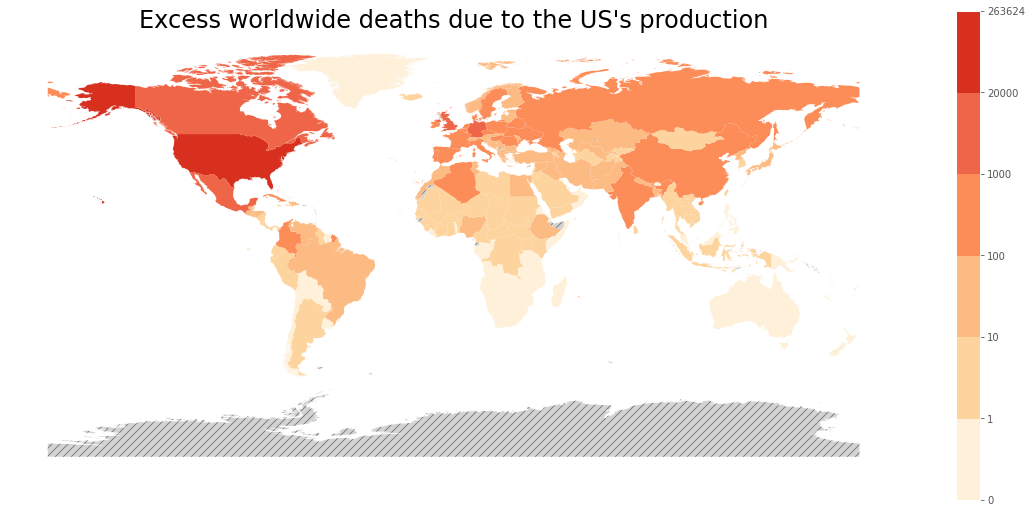

In [92]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='USA_pro',ax=ax, vmin=0,vmax=np.inf, legend=True, cmap = cmap, norm = norm, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",},
        legend_kwds={'fmt': "{:.2f}"})

colourbar = ax.get_figure().get_axes()[1]

yticks = ['0','1','10','100','1000','20000','263624']

colourbar.set_yticklabels(yticks)
    
plt.title('Excess worldwide deaths due to the US\'s production',fontsize=24)
ax.axis('off');

In [93]:
cmap = ListedColormap(['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f'])
bounds = [0,100,500,1000,5000,10000,172275]
norm = BoundaryNorm(bounds, cmap.N)

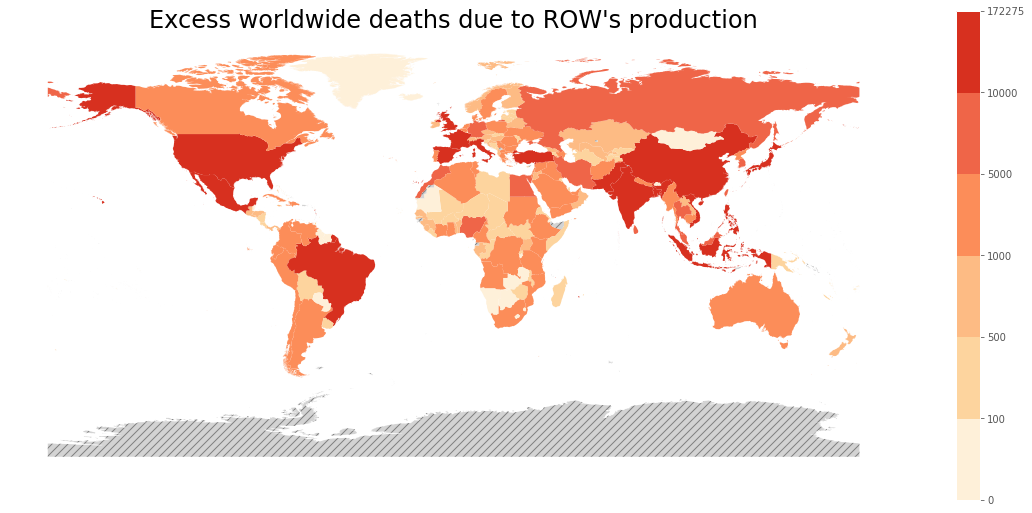

In [94]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='ROW_pro',ax=ax, vmin=0,vmax=np.inf, legend=True, cmap = cmap, norm = norm, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",},
        legend_kwds={'fmt': "{:.2f}"})

colourbar = ax.get_figure().get_axes()[1]

yticks = ['0','100','500','1000','5000','10000','172275']

colourbar.set_yticklabels(yticks)
    
plt.title('Excess worldwide deaths due to ROW\'s production',fontsize=24)
ax.axis('off');

In [95]:
cmap = ListedColormap(['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f'])
bounds = [0,1,10,100,500,30000,255500]
norm = BoundaryNorm(bounds, cmap.N)

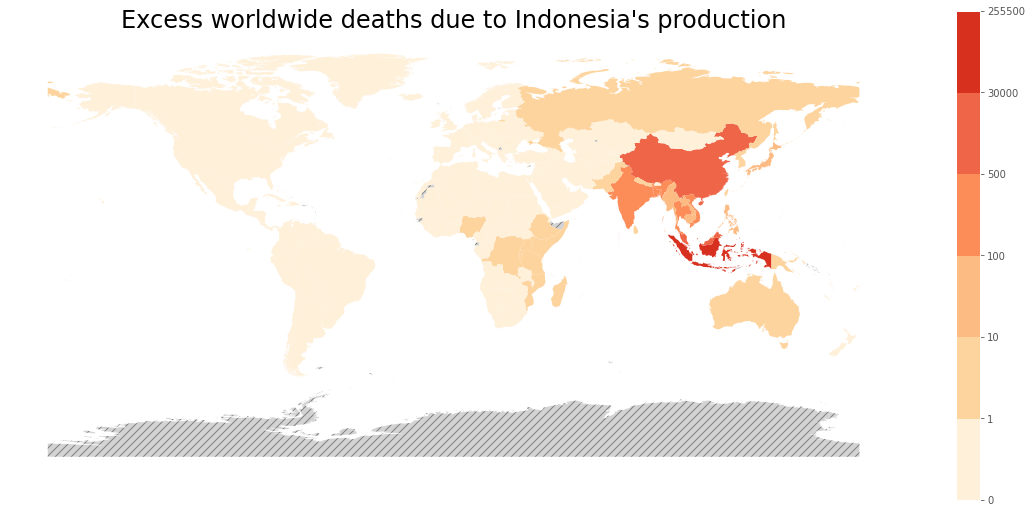

In [96]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='IDN_pro',ax=ax, vmin=0,vmax=np.inf, legend=True, cmap = cmap, norm = norm, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",},
        legend_kwds={'fmt': "{:.2f}"})

colourbar = ax.get_figure().get_axes()[1]

yticks = ['0','1','10','100','500','30000','255500']

colourbar.set_yticklabels(yticks)
    
plt.title('Excess worldwide deaths due to Indonesia\'s production',fontsize=24)
ax.axis('off');

In [97]:
cmap = ListedColormap(['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#e34a33','#b30000'])
bounds = [0,1,100,1000,5000,60000,1536420]
norm = BoundaryNorm(bounds, cmap.N)

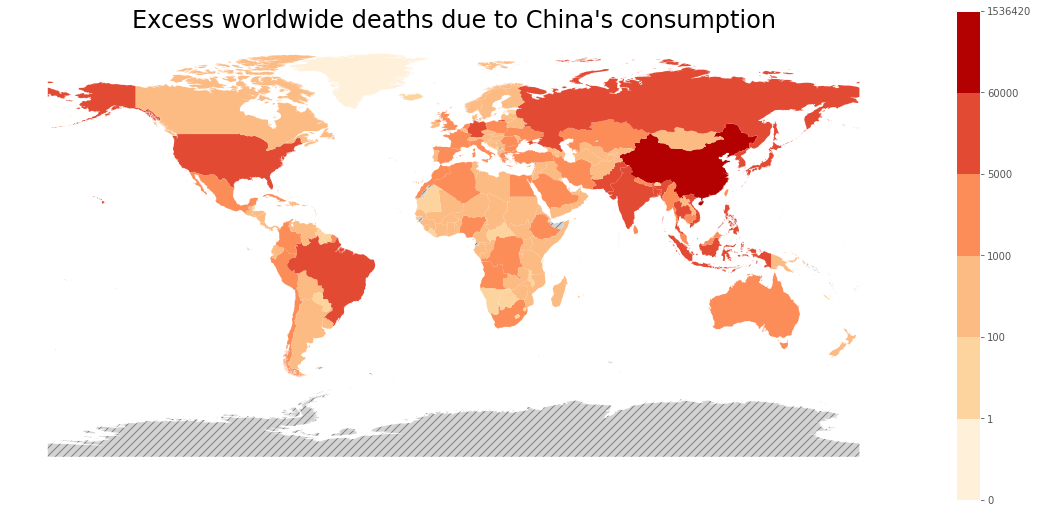

In [98]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='CHN_con',ax=ax, vmin=0,vmax=np.inf, legend=True, cmap = cmap, norm = norm, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",},
        legend_kwds={'fmt': "{:.2f}"})

colourbar = ax.get_figure().get_axes()[1]

yticks = ['0','1','100','1000','5000','60000','1536420']

colourbar.set_yticklabels(yticks)
    
plt.title('Excess worldwide deaths due to China\'s consumption',fontsize=24)
ax.axis('off');

In [99]:
cmap = ListedColormap(['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#e34a33','#b30000'])
bounds = [0,1,100,500,5000,90000,742276]
norm = BoundaryNorm(bounds, cmap.N)

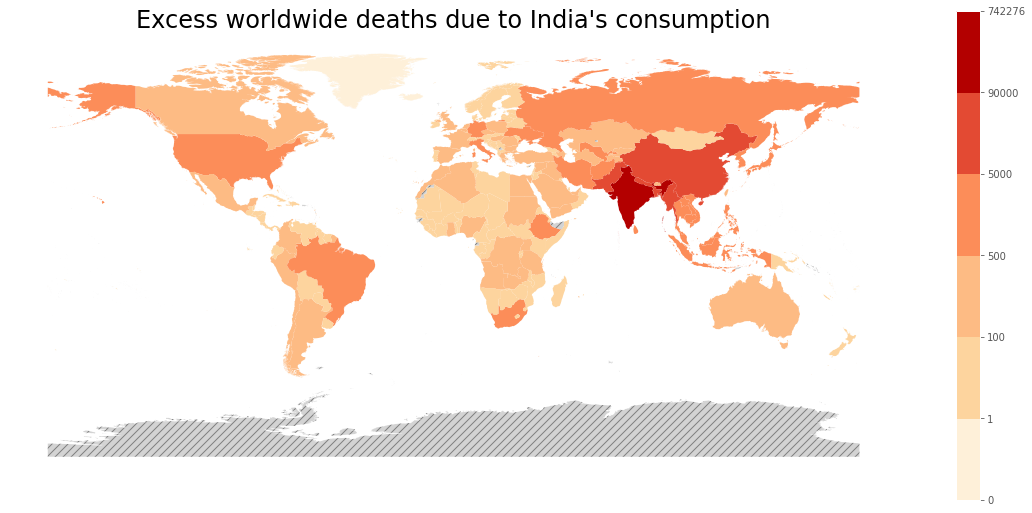

In [100]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='IND_con',ax=ax, vmin=0,vmax=np.inf, legend=True, cmap = cmap, norm = norm, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",},
        legend_kwds={'fmt': "{:.2f}"})

colourbar = ax.get_figure().get_axes()[1]

yticks = ['0','1','100','500','5000','90000','742276']

colourbar.set_yticklabels(yticks)
    
plt.title('Excess worldwide deaths due to India\'s consumption',fontsize=24)
ax.axis('off');

In [101]:
cmap = ListedColormap(['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f'])
bounds = [0,1,100,500,5000,60000,348948]
norm = BoundaryNorm(bounds, cmap.N)

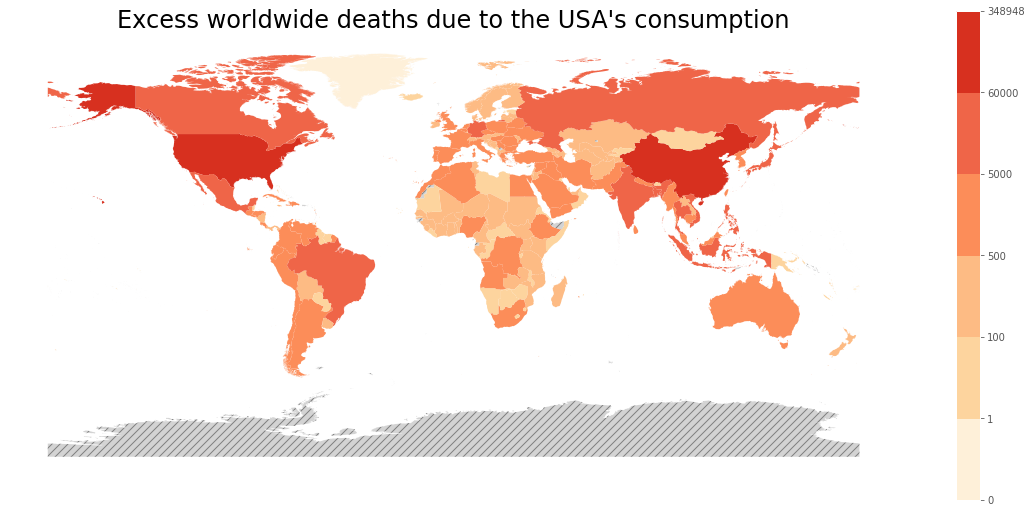

In [102]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='USA_con',ax=ax, vmin=0,vmax=np.inf, legend=True, cmap = cmap, norm = norm, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",},
        legend_kwds={'fmt': "{:.2f}"})

colourbar = ax.get_figure().get_axes()[1]

yticks = ['0','1','100','500','5000','60000','348948']

colourbar.set_yticklabels(yticks)
    
plt.title('Excess worldwide deaths due to the USA\'s consumption',fontsize=24)
ax.axis('off');

In [103]:
cmap = ListedColormap(['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f'])
bounds = [0,1,100,500,6000,50000,341003]
norm = BoundaryNorm(bounds, cmap.N)

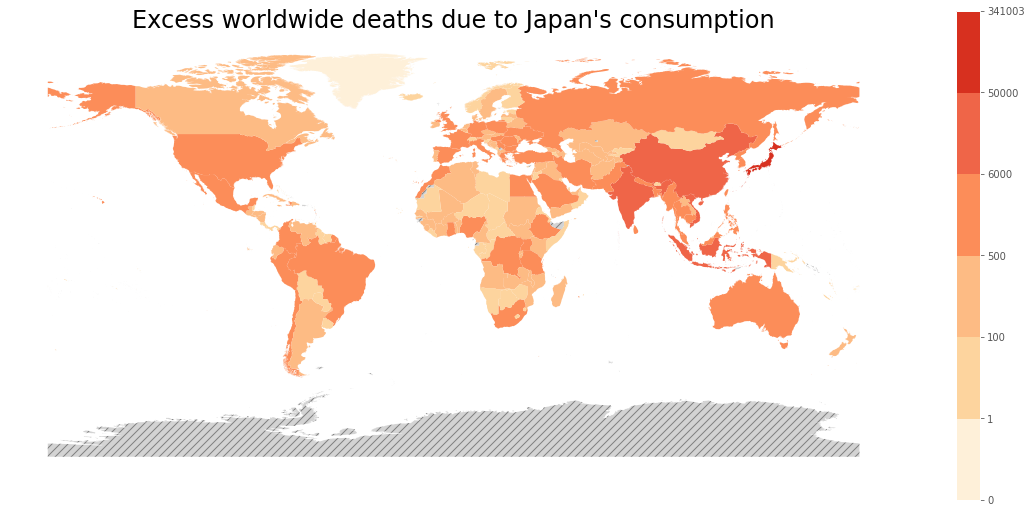

In [104]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='JPN_con',ax=ax, vmin=0,vmax=np.inf, legend=True, cmap = cmap, norm = norm, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",},
        legend_kwds={'fmt': "{:.2f}"})

colourbar = ax.get_figure().get_axes()[1]

yticks = ['0','1','100','500','6000','50000','341003']

colourbar.set_yticklabels(yticks)
    
plt.title('Excess worldwide deaths due to Japan\'s consumption',fontsize=24)
ax.axis('off');

In [105]:
print(dict(sorted(con_mort_tol['IDN'].items(), key=lambda item: item[1])))

{'FJI': 0.0, 'GRL': 4.730612450250907e-06, 'SMR': 0.020954921282858606, 'LIE': 0.08100125170089206, 'WSM': 0.1267969820595334, 'ABW': 0.19149881090949686, 'AND': 0.22577257373992607, 'VUT': 0.3112539785240097, 'VGB': 0.36135814068991773, 'BMU': 0.38322142709273427, 'CYM': 0.3905988252658398, 'MCO': 0.40981927910133237, 'ATG': 0.4100892784657771, 'ISL': 0.5023879864430183, 'STP': 0.8608907584026024, 'BLZ': 0.8721031774635947, 'PYF': 0.8973130279048454, 'SYC': 1.067014840634784, 'SWZ': 1.076342475901201, 'CPV': 1.1874583142483581, 'LUX': 1.2168871232018754, 'SUR': 1.3415491807747728, 'NAM': 1.3698023601313483, 'GUY': 1.5081645240857207, 'BWA': 1.782757924220972, 'BRB': 1.8862011092889706, 'MRT': 2.2194290855448067, 'MLT': 2.2374516341606054, 'LSO': 2.366249531181333, 'PRY': 2.4271492064960603, 'NCL': 2.7400909141667067, 'DJI': 2.7443046081174427, 'GMB': 2.772774606442669, 'MDV': 2.783262181542109, 'BHS': 2.794371668673305, 'BTN': 2.9303696451270715, 'MNG': 4.167257175338031, 'BRN': 4.559

In [106]:
cmap = ListedColormap(['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f'])
bounds = [0,10,50,100,1000,10000,222907]
norm = BoundaryNorm(bounds, cmap.N)

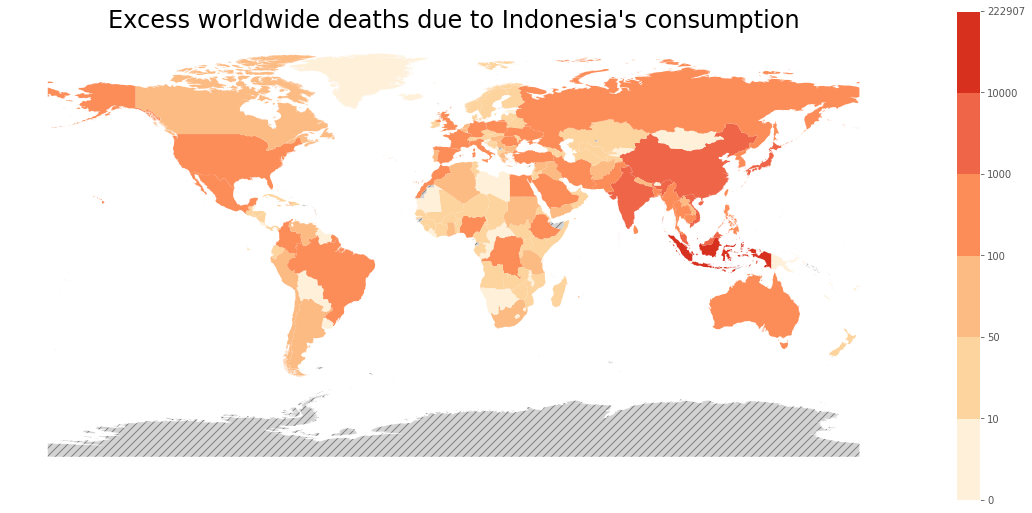

In [107]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='IDN_con',ax=ax, vmin=0,vmax=np.inf, legend=True, cmap = cmap, norm = norm, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",},
        legend_kwds={'fmt': "{:.2f}"})

colourbar = ax.get_figure().get_axes()[1]

yticks = ['0','10','50','100','1000','10000','222907']

colourbar.set_yticklabels(yticks)
    
plt.title('Excess worldwide deaths due to Indonesia\'s consumption',fontsize=24)
ax.axis('off');

----

In [152]:
cmap = ListedColormap(['mistyrose','pink','lightcoral','indianred','brown'])
bounds = [np.percentile(list(pro_world.values()),20),np.percentile(list(pro_world.values()),50),np.percentile(list(pro_world.values()),70)
         ,np.percentile(list(pro_world.values()),90),np.percentile(list(pro_world.values()),97),np.percentile(list(pro_world.values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

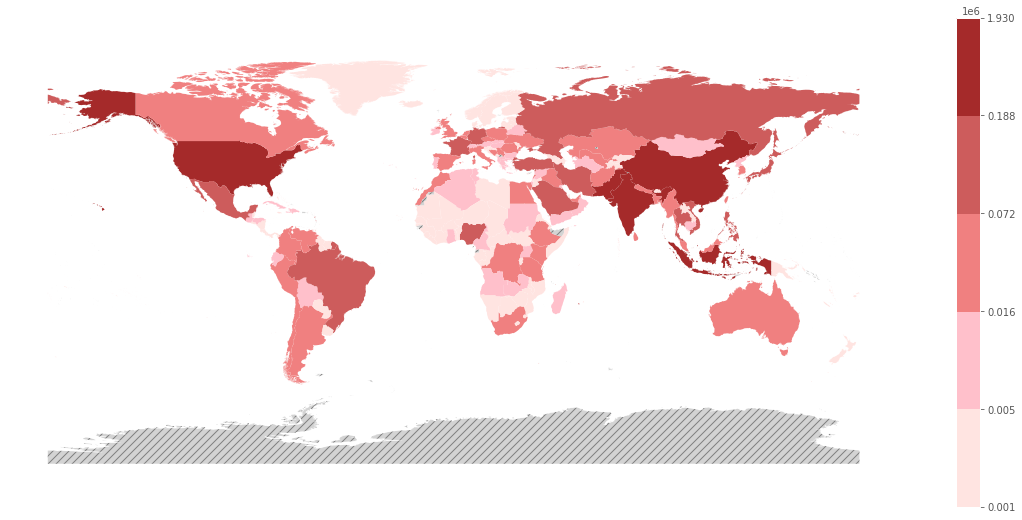

In [153]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='pro_world',ax=ax, vmin=0,vmax=pro_world['CHN'],legend=True,cmap = cmap,norm = norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })

# plt.title('Excess worldwide deaths due to domestic production',fontsize=24)

ax.axis('off')

In [154]:
cmap = ListedColormap(['mistyrose','pink','lightcoral','indianred','brown'])
bounds = [np.percentile(list(con_world.values()),20),np.percentile(list(con_world.values()),50),np.percentile(list(con_world.values()),70)
         ,np.percentile(list(con_world.values()),80),np.percentile(list(con_world.values()),97),np.percentile(list(con_world.values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

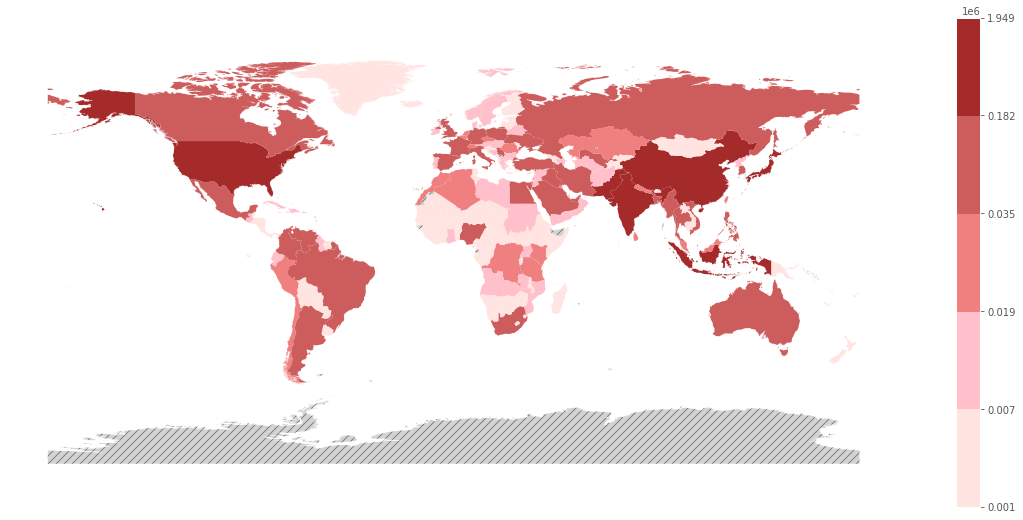

In [155]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='con_world',ax=ax, vmin=88,vmax=con_world['CHN'],legend=True,cmap = cmap,norm = norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })

# plt.title('Excess worldwide deaths due to domestic consumption',fontsize=24)

ax.axis('off')

-----

In [112]:
cmap = ListedColormap(['mistyrose','lightcoral','coral','red'])
bounds = [np.percentile(list(VSL.values()),20),np.percentile(list(VSL.values()),50),np.percentile(list(VSL.values()),80)
         ,np.percentile(list(VSL.values()),95),np.percentile(list(VSL.values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

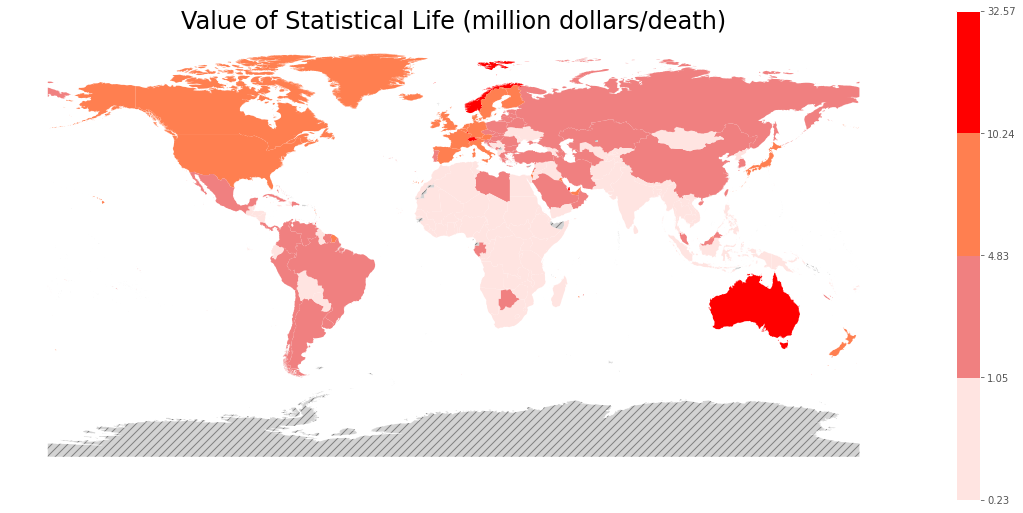

In [113]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='VSL',ax=ax, vmin=1,vmax=8000,legend=True,cmap = cmap,norm = norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })

plt.title('Value of Statistical Life (million dollars/death)',fontsize=24)

ax.axis('off')

In [114]:
cmap = ListedColormap(['mistyrose','lightcoral','coral','red'])
bounds = [np.percentile(list(VSL_pro_death.values()),20),np.percentile(list(VSL_pro_death.values()),50),np.percentile(list(VSL_pro_death.values()),80)
         ,np.percentile(list(VSL_pro_death.values()),95),np.percentile(list(VSL_pro_death.values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

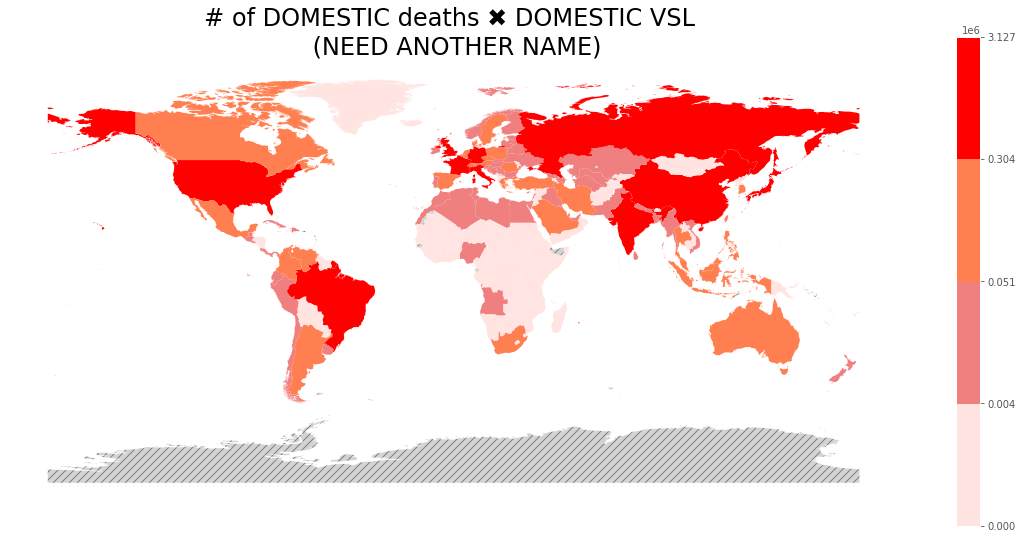

In [115]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='VSL_by_death',ax=ax, vmin=1,vmax=8000,legend=True,cmap = cmap,norm = norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })

plt.title('# of DOMESTIC deaths ✖ DOMESTIC VSL \n (NEED ANOTHER NAME)',fontsize=24)

ax.axis('off')

In [116]:
cmap = ListedColormap(['mistyrose','pink','lightcoral','indianred','brown'])
bounds = [np.percentile(list(con_death.values()),0),np.percentile(list(con_death.values()),50),np.percentile(list(con_death.values()),80)
         ,np.percentile(list(con_death.values()),90),np.percentile(list(con_death.values()),98.5),np.percentile(list(con_death.values()),99.465)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

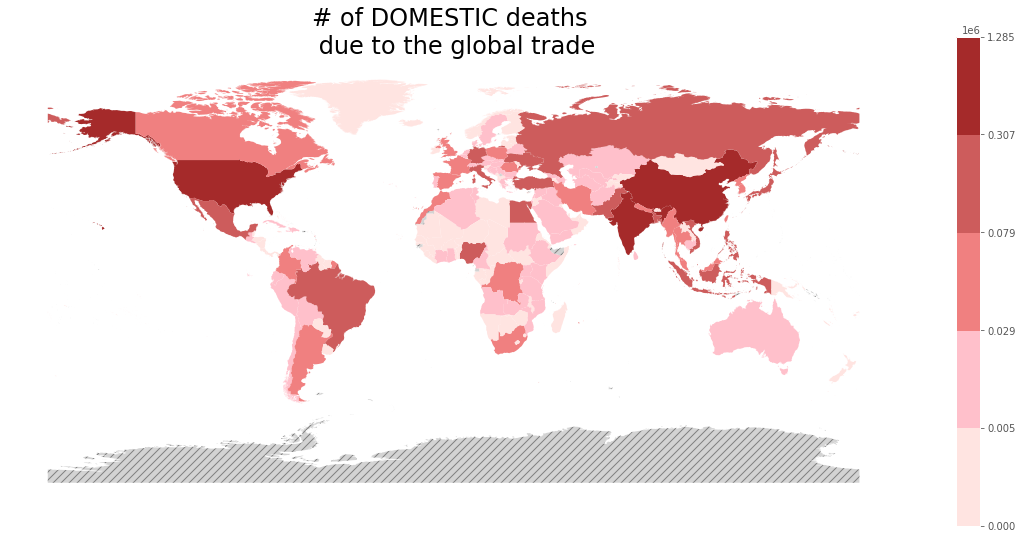

In [117]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='total_dom_death',ax=ax, vmin=1,vmax=con_death['CHN'],legend=True,cmap = cmap,norm = norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })

plt.title('# of DOMESTIC deaths \n due to the global trade',fontsize=24)

ax.axis('off')

-----

In [118]:
cmap = ListedColormap(['mistyrose','lightcoral','coral','red'])
bounds = [np.percentile(list(con_world_permillion.values()),20),np.percentile(list(con_world_permillion.values()),50),np.percentile(list(con_world_permillion.values()),80)
         ,np.percentile(list(con_world_permillion.values()),95),np.percentile(list(con_world_permillion.values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

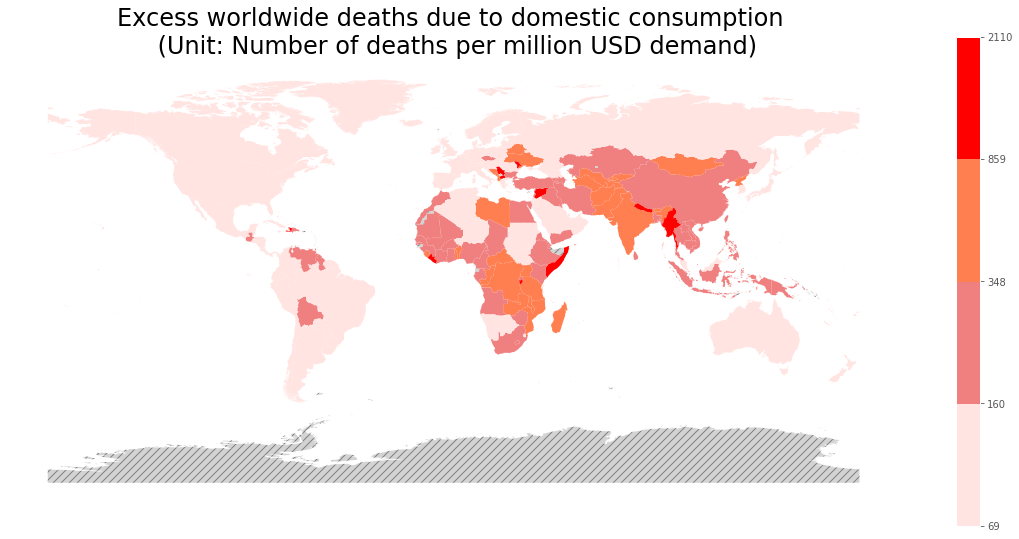

In [119]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='con_permillion',ax=ax, vmin=1,vmax=max(list(con_world_permillion.values())),legend=True,cmap = cmap,norm = norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })

plt.title('Excess worldwide deaths due to domestic consumption \n (Unit: Number of deaths per million USD demand)',fontsize=24)

ax.axis('off')

In [120]:
print(dict(sorted(pro_world_permillion.items(), key=lambda item: item[1])))

{'FJI': 0.0, 'BMU': 0.00028412947457395196, 'CYM': 0.006931682896383039, 'GUY': 0.3172164147211973, 'MCO': 0.4076428588131035, 'SYC': 0.40875372478410443, 'LIE': 0.5067423200296545, 'SMR': 0.5087492934068919, 'ABW': 0.7097468147483268, 'SGP': 0.8615406043317035, 'NOR': 0.8904156909386702, 'AND': 0.9419139994471779, 'MLT': 1.0471581558823704, 'SWE': 1.1452998907527048, 'VGB': 1.1503283506833242, 'ISL': 1.1641414963336831, 'WSM': 1.2115783439344412, 'FIN': 1.578907593195462, 'LUX': 1.8675381138665665, 'ATG': 2.095960444722682, 'CHE': 2.126231530422189, 'DNK': 2.367544485086133, 'PYF': 2.3777711243386714, 'NZL': 2.415421060741537, 'AUS': 2.953310931117994, 'MAC': 2.983830052907423, 'BRN': 3.04469733269061, 'BHR': 3.080179044383033, 'GRL': 3.1793822511997427, 'CPV': 3.2339594394315565, 'IRL': 3.4975814199037094, 'NLD': 4.065413291715965, 'AUT': 4.125459914110505, 'KOR': 4.126454505498569, 'USA': 4.162896356617388, 'SDS': 4.199282153246461, 'CAN': 4.676863990502998, 'MDV': 4.686101102812978

In [121]:
cmap = ListedColormap(['mistyrose','lightcoral','coral','red'])
bounds = [np.percentile(list(pro_world_permillion.values()),20),np.percentile(list(pro_world_permillion.values()),50),np.percentile(list(pro_world_permillion.values()),80)
         ,np.percentile(list(pro_world_permillion.values()),95),np.percentile(list(pro_world_permillion.values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

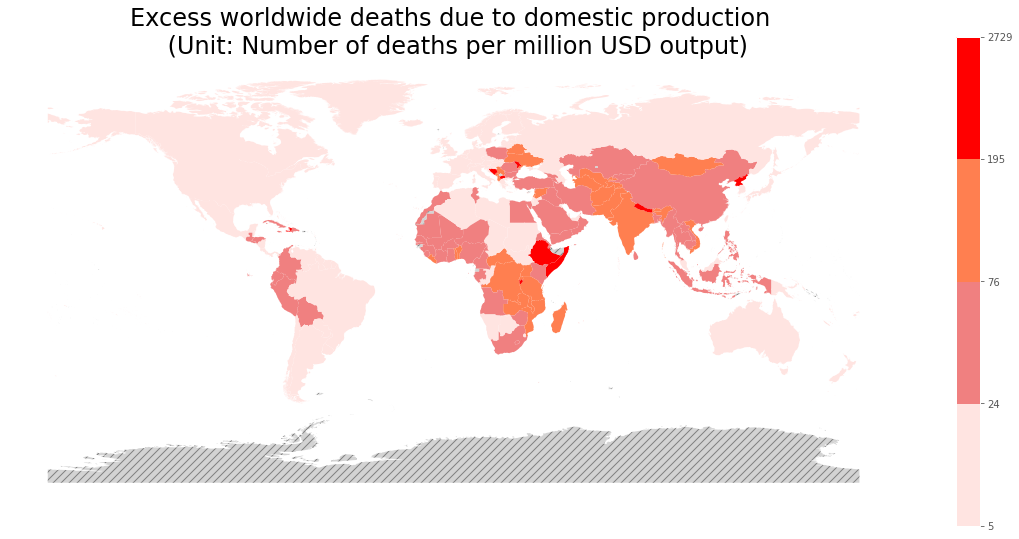

In [122]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='pro_permillion',ax=ax, vmin=1,vmax=max(list(pro_world_permillion.values())),legend=True,cmap = cmap,norm = norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })

plt.title('Excess worldwide deaths due to domestic production \n (Unit: Number of deaths per million USD output)',fontsize=24)

ax.axis('off')

------

In [123]:
# cmap = ListedColormap(['mistyrose','lightcoral','salmon','coral','tomato','orangered','red'])
cmap = ListedColormap(['mistyrose','lightcoral','coral','red'])
bounds = [np.percentile(list(con_world_capita.values()),20),np.percentile(list(con_world_capita.values()),50),np.percentile(list(con_world_capita.values()),80)
         ,np.percentile(list(con_world_capita.values()),95),np.percentile(list(con_world_capita.values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

In [124]:
con_world['VEN']/population['VEN']

0.003471758885007931

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

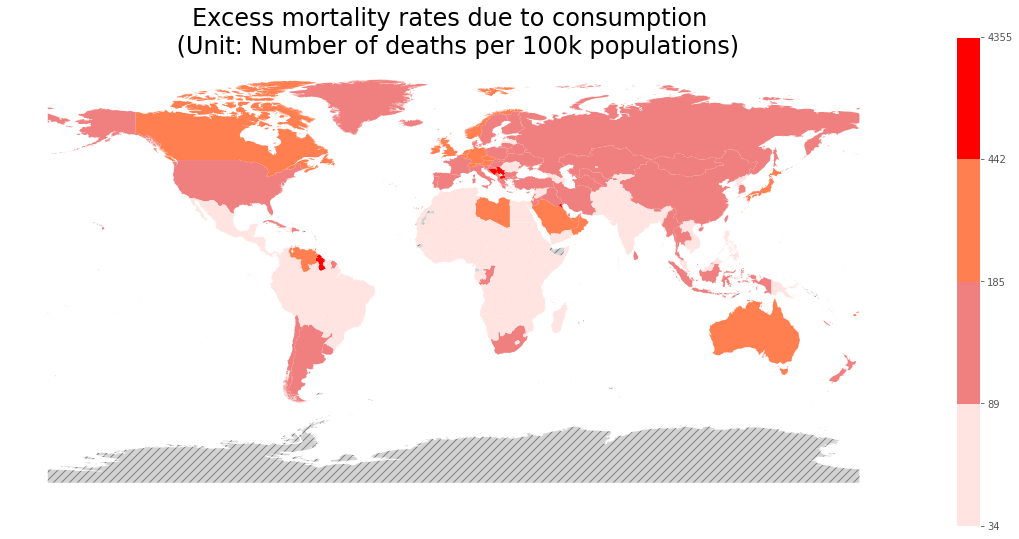

In [125]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='consumption',ax=ax, vmin=1,vmax=570,legend=True,cmap = cmap,norm = norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })

plt.title('Excess mortality rates due to consumption \n (Unit: Number of deaths per 100k populations)',fontsize=24)

ax.axis('off')

In [126]:
# cmap = ListedColormap(['mistyrose','lightcoral','salmon','coral','tomato','orangered','red'])
cmap = ListedColormap(['mistyrose','lightcoral','coral','red'])
bounds = [np.percentile(list(pro_world_capita.values()),20),np.percentile(list(pro_world_capita.values()),50),np.percentile(list(pro_world_capita.values()),80)
         ,np.percentile(list(pro_world_capita.values()),95),np.percentile(list(pro_world_capita.values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

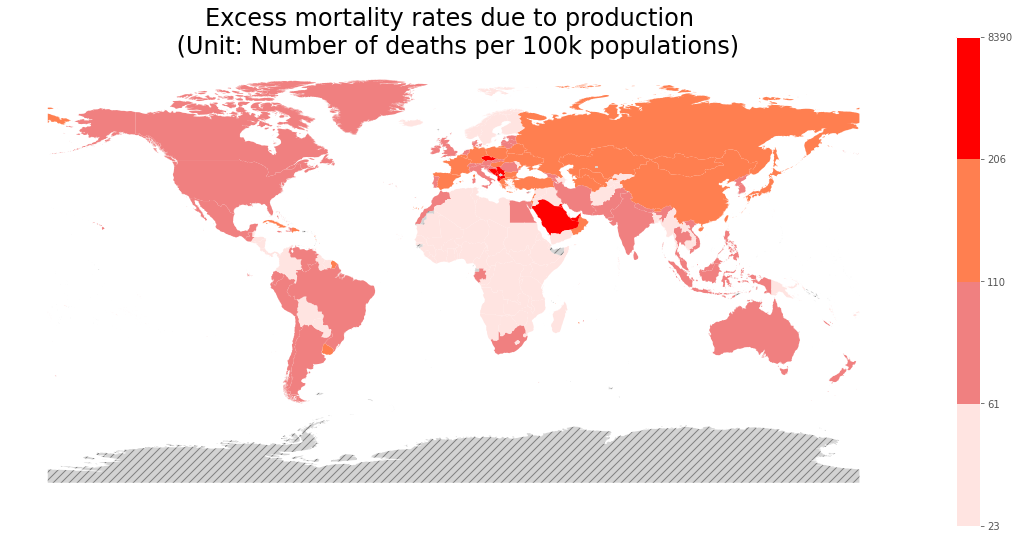

In [127]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column='production',ax=ax, vmin=1,vmax=150,legend=True,cmap = cmap,norm = norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })
plt.title('Excess mortality rates due to production \n (Unit: Number of deaths per 100k populations)',fontsize=24)

ax.axis('off')

In [128]:
# cmap = ListedColormap(['mistyrose','lightcoral','salmon','coral','tomato','orangered','red'])
cmap = ListedColormap(['mistyrose','lightcoral','coral','red'])
bounds = [np.percentile(list(con_mort['CHN'].values()),20),np.percentile(list(con_mort['CHN'].values()),50),np.percentile(list(con_mort['CHN'].values()),80)
         ,np.percentile(list(con_mort['CHN'].values()),95),np.percentile(list(con_mort['CHN'].values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

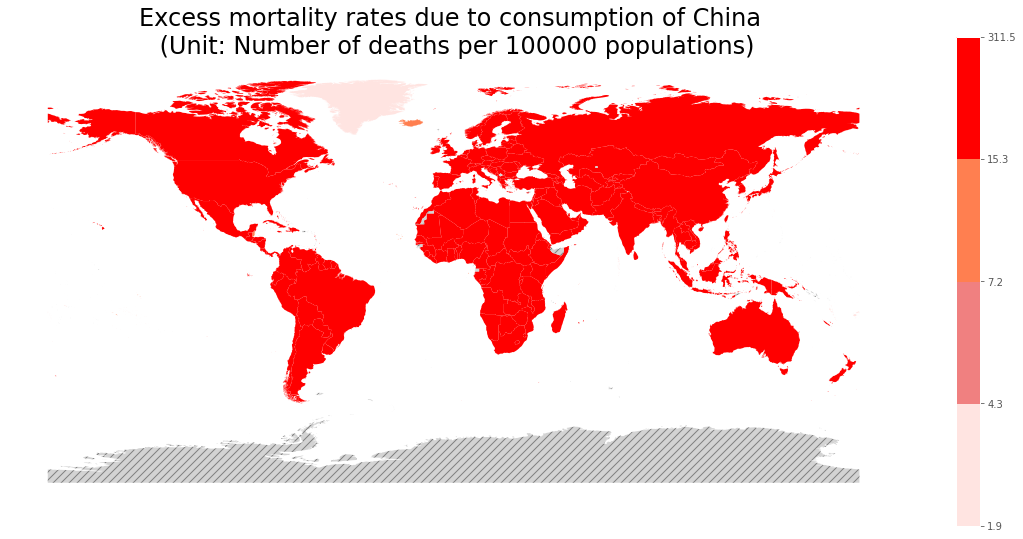

In [129]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column='CHN_con',ax=ax, vmin=1,vmax=150,legend=True,cmap = cmap,norm=norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })
plt.title('Excess mortality rates due to consumption of China \n (Unit: Number of deaths per 100000 populations)',fontsize=24)

ax.axis('off')

In [130]:
# cmap = ListedColormap(['mistyrose','lightcoral','salmon','coral','tomato','orangered','red'])
cmap = ListedColormap(['mistyrose','lightcoral','coral','red'])
bounds = [np.percentile(list(pro_mort['CHN'].values()),20),np.percentile(list(pro_mort['CHN'].values()),50),np.percentile(list(pro_mort['CHN'].values()),80)
         ,np.percentile(list(pro_mort['CHN'].values()),95),np.percentile(list(pro_mort['CHN'].values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

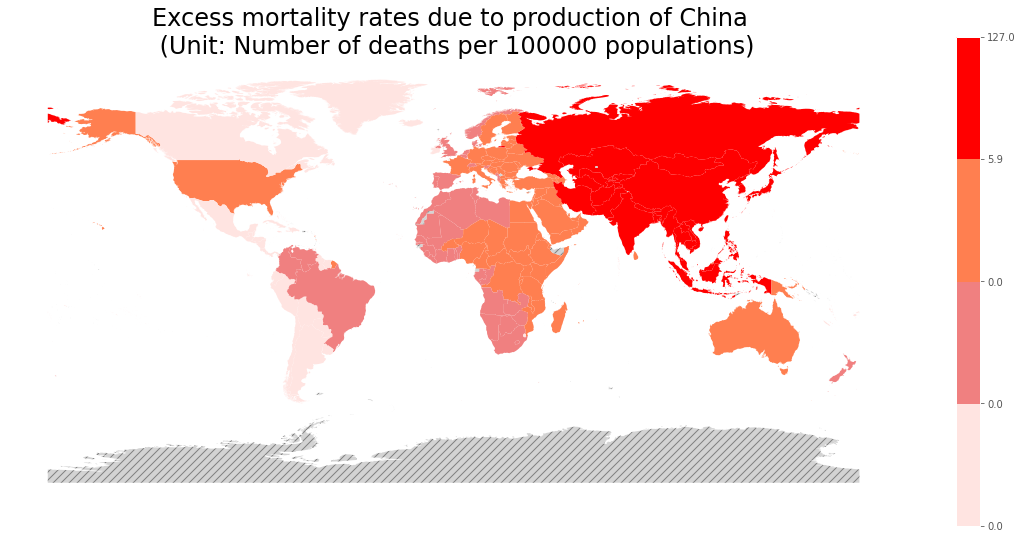

In [131]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column='CHN_pro',ax=ax, vmin=1,vmax=150,legend=True,cmap = cmap,norm=norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })
plt.title('Excess mortality rates due to production of China \n (Unit: Number of deaths per 100000 populations)',fontsize=24)

ax.axis('off')

In [132]:
# cmap = ListedColormap(['mistyrose','lightcoral','salmon','coral','tomato','orangered','red'])
cmap = ListedColormap(['mistyrose','lightcoral','coral','red'])
bounds = [np.percentile(list(con_mort['USA'].values()),20),np.percentile(list(con_mort['USA'].values()),50),np.percentile(list(con_mort['USA'].values()),80)
         ,np.percentile(list(con_mort['USA'].values()),95),np.percentile(list(con_mort['USA'].values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

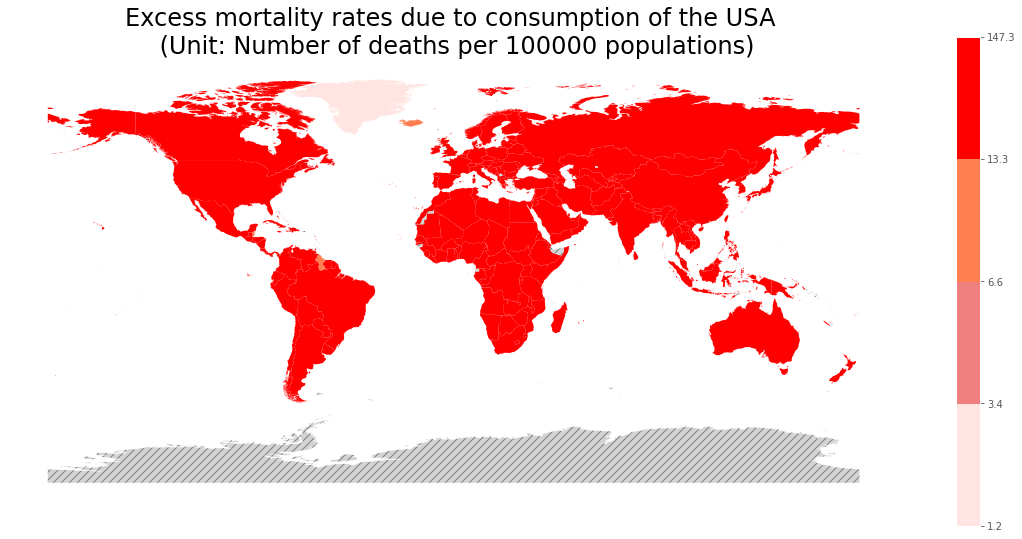

In [133]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column='USA_con',ax=ax, vmin=1,vmax=150,legend=True,cmap = cmap,norm=norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })
plt.title('Excess mortality rates due to consumption of the USA \n (Unit: Number of deaths per 100000 populations)',fontsize=24)

ax.axis('off')

In [134]:
# cmap = ListedColormap(['mistyrose','lightcoral','salmon','coral','tomato','orangered','red'])
cmap = ListedColormap(['mistyrose','lightcoral','coral','red'])
bounds = [np.percentile(list(pro_mort['USA'].values()),20),np.percentile(list(pro_mort['USA'].values()),50),np.percentile(list(pro_mort['USA'].values()),80)
         ,np.percentile(list(pro_mort['USA'].values()),95),np.percentile(list(pro_mort['USA'].values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

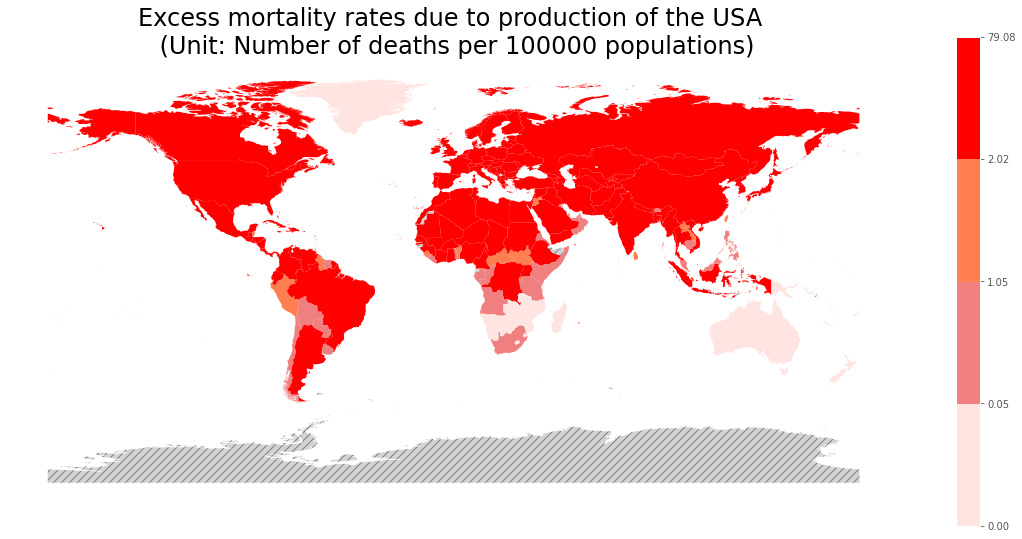

In [135]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column='USA_pro',ax=ax, vmin=1,vmax=150,legend=True,cmap = cmap,norm=norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })
plt.title('Excess mortality rates due to production of the USA \n (Unit: Number of deaths per 100000 populations)',fontsize=24)

ax.axis('off')

---

In [136]:
# cmap = ListedColormap(['mistyrose','lightcoral','salmon','coral','tomato','orangered','red'])
cmap = ListedColormap(['mistyrose','lightcoral','coral','red'])
bounds = [np.percentile(list(final_demand.values()),20),np.percentile(list(final_demand.values()),50),np.percentile(list(final_demand.values()),80)
         ,np.percentile(list(final_demand.values()),95),np.percentile(list(final_demand.values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

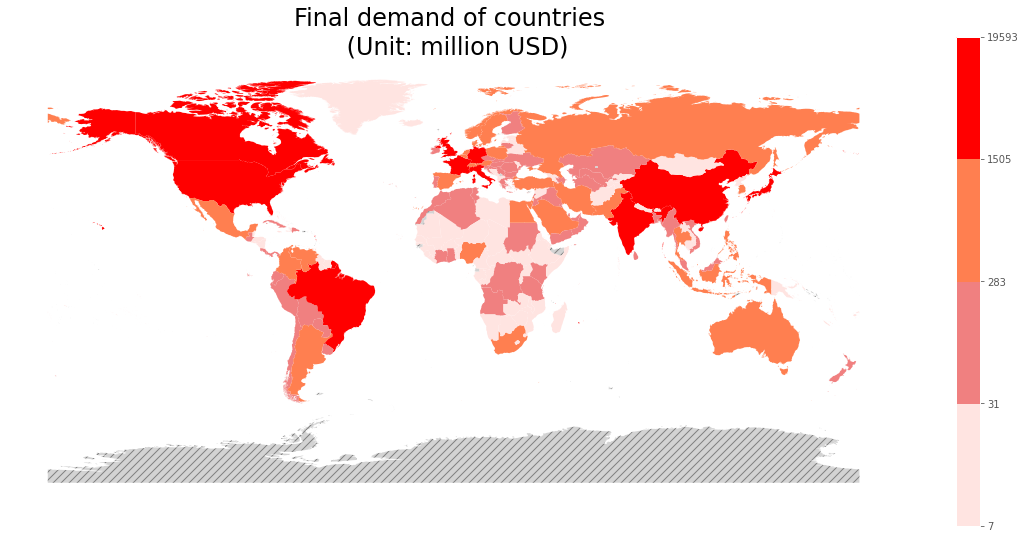

In [137]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column="final_demand",ax=ax, vmin=1,vmax=150,legend=True,cmap = cmap,norm=norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })
plt.title('Final demand of countries \n (Unit: million USD)',fontsize=24)

ax.axis('off')

## Final demand per capita

In [138]:
# cmap = ListedColormap(['mistyrose','lightcoral','salmon','coral','tomato','orangered','red'])
cmap = ListedColormap(['mistyrose','lightcoral','coral','red'])
bounds = [np.percentile(list(con_world_permillion.values()),20),np.percentile(list(con_world_permillion.values()),50),np.percentile(list(con_world_permillion.values()),80)
         ,np.percentile(list(con_world_permillion.values()),95),np.percentile(list(con_world_permillion.values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

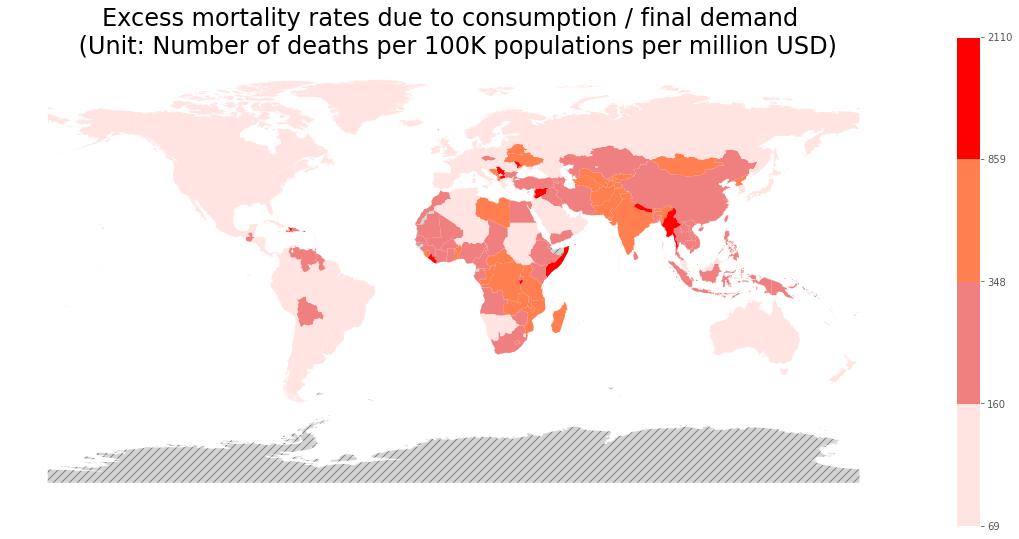

In [139]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column="con_permillion",ax=ax, vmin=1,vmax=150,legend=True,cmap = cmap,norm=norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })
plt.title('Excess mortality rates due to consumption / final demand \n (Unit: Number of deaths per 100K populations per million USD)',fontsize=24)

ax.axis('off')

In [140]:
# cmap = ListedColormap(['mistyrose','lightcoral','salmon','coral','tomato','orangered','red'])
cmap = ListedColormap(['mistyrose','lightcoral','coral','red'])
bounds = [np.percentile(list(total_output.values()),20),np.percentile(list(total_output.values()),50),np.percentile(list(total_output.values()),80)
         ,np.percentile(list(total_output.values()),95),np.percentile(list(total_output.values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

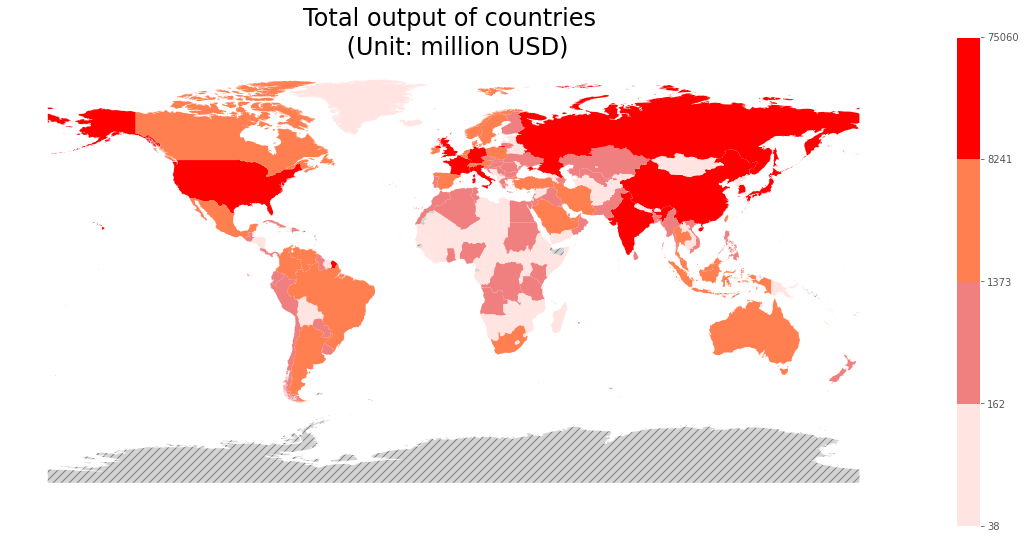

In [141]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column="total_output",ax=ax, vmin=1,vmax=150,legend=True,cmap = cmap,norm=norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })
plt.title('Total output of countries \n (Unit: million USD)',fontsize=24)

ax.axis('off')

In [142]:
# cmap = ListedColormap(['mistyrose','lightcoral','salmon','coral','tomato','orangered','red'])
cmap = ListedColormap(['mistyrose','lightcoral','coral','red'])
bounds = [np.percentile(list(pro_world_permillion.values()),20),np.percentile(list(pro_world_permillion.values()),50),np.percentile(list(pro_world_permillion.values()),80)
         ,np.percentile(list(pro_world_permillion.values()),95),np.percentile(list(pro_world_permillion.values()),100)]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

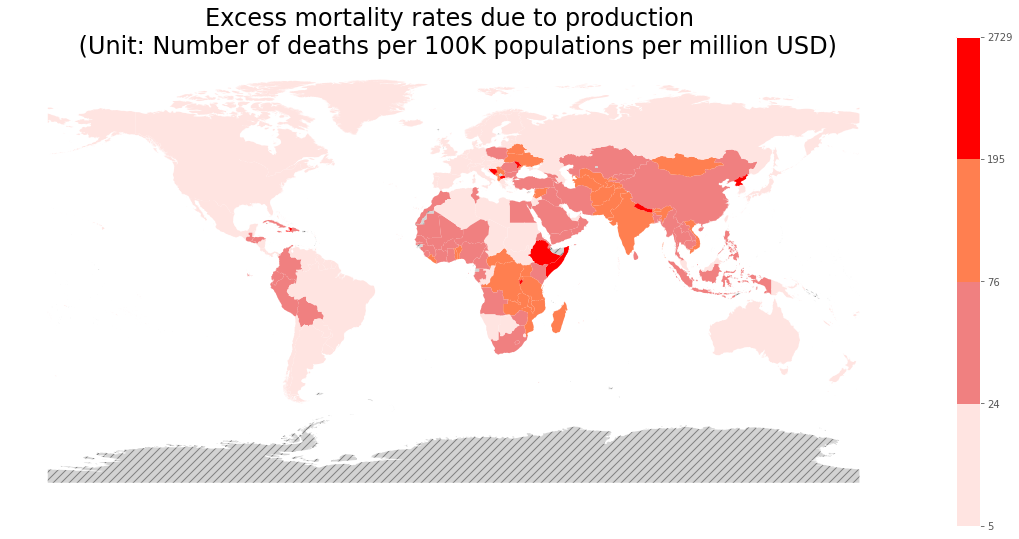

In [143]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column="pro_permillion",ax=ax, vmin=1,vmax=150,legend=True,cmap = cmap,norm=norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    })
plt.title('Excess mortality rates due to production \n (Unit: Number of deaths per 100K populations per million USD)',fontsize=24)

ax.axis('off')

In [144]:
# Shift cmap
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [145]:
shifted_cmap = shiftedColorMap(matplotlib.cm.PiYG, midpoint=25/105, name='shifted')

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

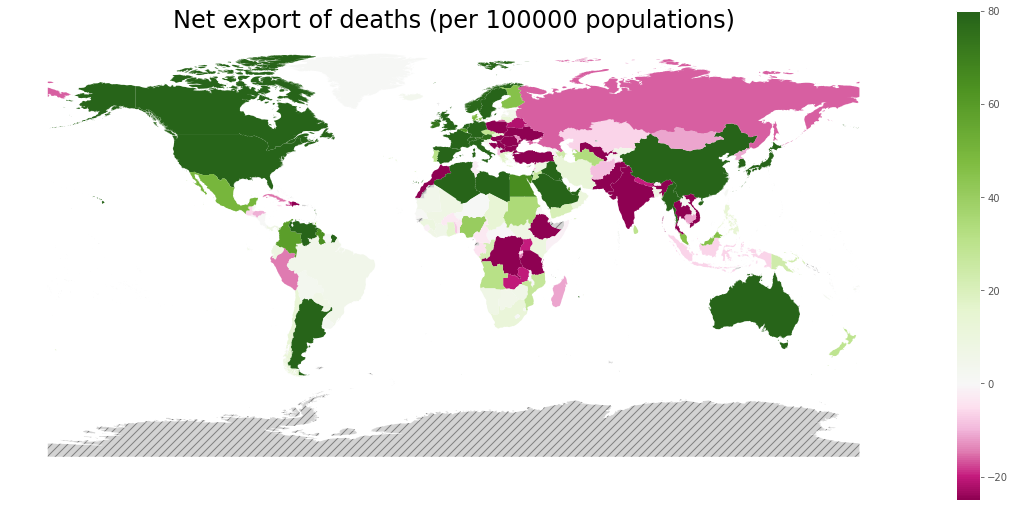

In [146]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column='net_export_capita',ax=ax, vmin=-25,vmax=80,legend=True,cmap = shifted_cmap,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
plt.title('Net export of deaths (per 100000 populations)',fontsize=24)
ax.axis('off')

In [147]:
list(reversed(range(1,11)))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [148]:
num_list = [21,13,19,3,11,5,18]
num_list.sort()
num_list[len(num_list)//2]

13

In [149]:
list_1 = [1,2,3,4]
list_1[-2]

3

In [150]:
y="stuff;thing;junk"
z=y.split(';')
z
5!=6

True

In [151]:
import numpy as np
a= np.array([1,2,3,4])
a[[False, True,False,False]]

number = 3
print(f'the number is {number}')
[1,2,3]*3
import math

{x:x*x for x in range(1,100)}

the number is 3


{1: 1,
 2: 4,
 3: 9,
 4: 16,
 5: 25,
 6: 36,
 7: 49,
 8: 64,
 9: 81,
 10: 100,
 11: 121,
 12: 144,
 13: 169,
 14: 196,
 15: 225,
 16: 256,
 17: 289,
 18: 324,
 19: 361,
 20: 400,
 21: 441,
 22: 484,
 23: 529,
 24: 576,
 25: 625,
 26: 676,
 27: 729,
 28: 784,
 29: 841,
 30: 900,
 31: 961,
 32: 1024,
 33: 1089,
 34: 1156,
 35: 1225,
 36: 1296,
 37: 1369,
 38: 1444,
 39: 1521,
 40: 1600,
 41: 1681,
 42: 1764,
 43: 1849,
 44: 1936,
 45: 2025,
 46: 2116,
 47: 2209,
 48: 2304,
 49: 2401,
 50: 2500,
 51: 2601,
 52: 2704,
 53: 2809,
 54: 2916,
 55: 3025,
 56: 3136,
 57: 3249,
 58: 3364,
 59: 3481,
 60: 3600,
 61: 3721,
 62: 3844,
 63: 3969,
 64: 4096,
 65: 4225,
 66: 4356,
 67: 4489,
 68: 4624,
 69: 4761,
 70: 4900,
 71: 5041,
 72: 5184,
 73: 5329,
 74: 5476,
 75: 5625,
 76: 5776,
 77: 5929,
 78: 6084,
 79: 6241,
 80: 6400,
 81: 6561,
 82: 6724,
 83: 6889,
 84: 7056,
 85: 7225,
 86: 7396,
 87: 7569,
 88: 7744,
 89: 7921,
 90: 8100,
 91: 8281,
 92: 8464,
 93: 8649,
 94: 8836,
 95: 9025,
 96: 92